In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading Dataset
data=pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
data

EmpNumber  Age  Gender EducationBackground MaritalStatus  \
0     E1001000   32    Male           Marketing        Single   
1     E1001006   47    Male           Marketing        Single   
2     E1001007   40    Male       Life Sciences       Married   
3     E1001009   41    Male     Human Resources      Divorced   
4     E1001010   60    Male           Marketing        Single   
...        ...  ...     ...                 ...           ...   
1195   E100992   27  Female             Medical      Divorced   
1196   E100993   37    Male       Life Sciences        Single   
1197   E100994   50    Male             Medical       Married   
1198   E100995   34  Female             Medical        Single   
1199   E100998   24  Female       Life Sciences        Single   

        EmpDepartment        EmpJobRole BusinessTravelFrequency  \
0               Sales   Sales Executive           Travel_Rarely   
1               Sales   Sales Executive           Travel_Rarely   
2               Sales   Sales Executive       Travel_Frequently   
3     Human Resources           Manager           Travel_Rarely   
4               Sales   Sales Executive           Travel_Rarely   
...               ...               ...                     ...   
1195            Sales   Sales Executive       Travel_Frequently   
1196      Development  Senior Developer           Travel_Rarely   
1197      Development  Senior Developer           Travel_Rarely   
1198     Data Science    Data Scientist           Travel_Rarely   
1199            Sales   Sales Executive           Travel_Rarely   

      DistanceFromHome  EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                   10                  3  ...                            4   
1                   14                  4  ...                            4   
2                    5                  4  ...                            3   
3                   10                  4  ...                            2   
4                   16                  4  ...                            4   
...                ...                ...  ...                          ...   
1195                 3                  1  ...                            2   
1196                10                  2  ...                            1   
1197                28                  1  ...                            3   
1198                 9                  3  ...                            2   
1199                 3                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                             10                      2                   2   
1                             20                      2                   3   
2                             20                      2                   3   
3                             23                      2                   2   
4                             10                      1                   3   
...                          ...                    ...                 ...   
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                               10                             7   
1                                7                             7   
2                               18                            13   
3                               21                             6   
4                                2                             2   
...                            ...                           ...   
1195                             6           

In [3]:
#getting categorical and numerical Features
numerical_feature= [feature for feature in data.columns if data[feature].dtype!='O']
categorical_feature=[feature for feature in data.columns if data[feature].dtype=='O']
print('\nWe have {} numerical feature{}'.format(len(numerical_feature),numerical_feature))
print('\n\nWe have {} categorical feature{}'.format(len(categorical_feature),categorical_feature))


We have 19 numerical feature['Age', 'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PerformanceRating']


We have 9 categorical feature['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']


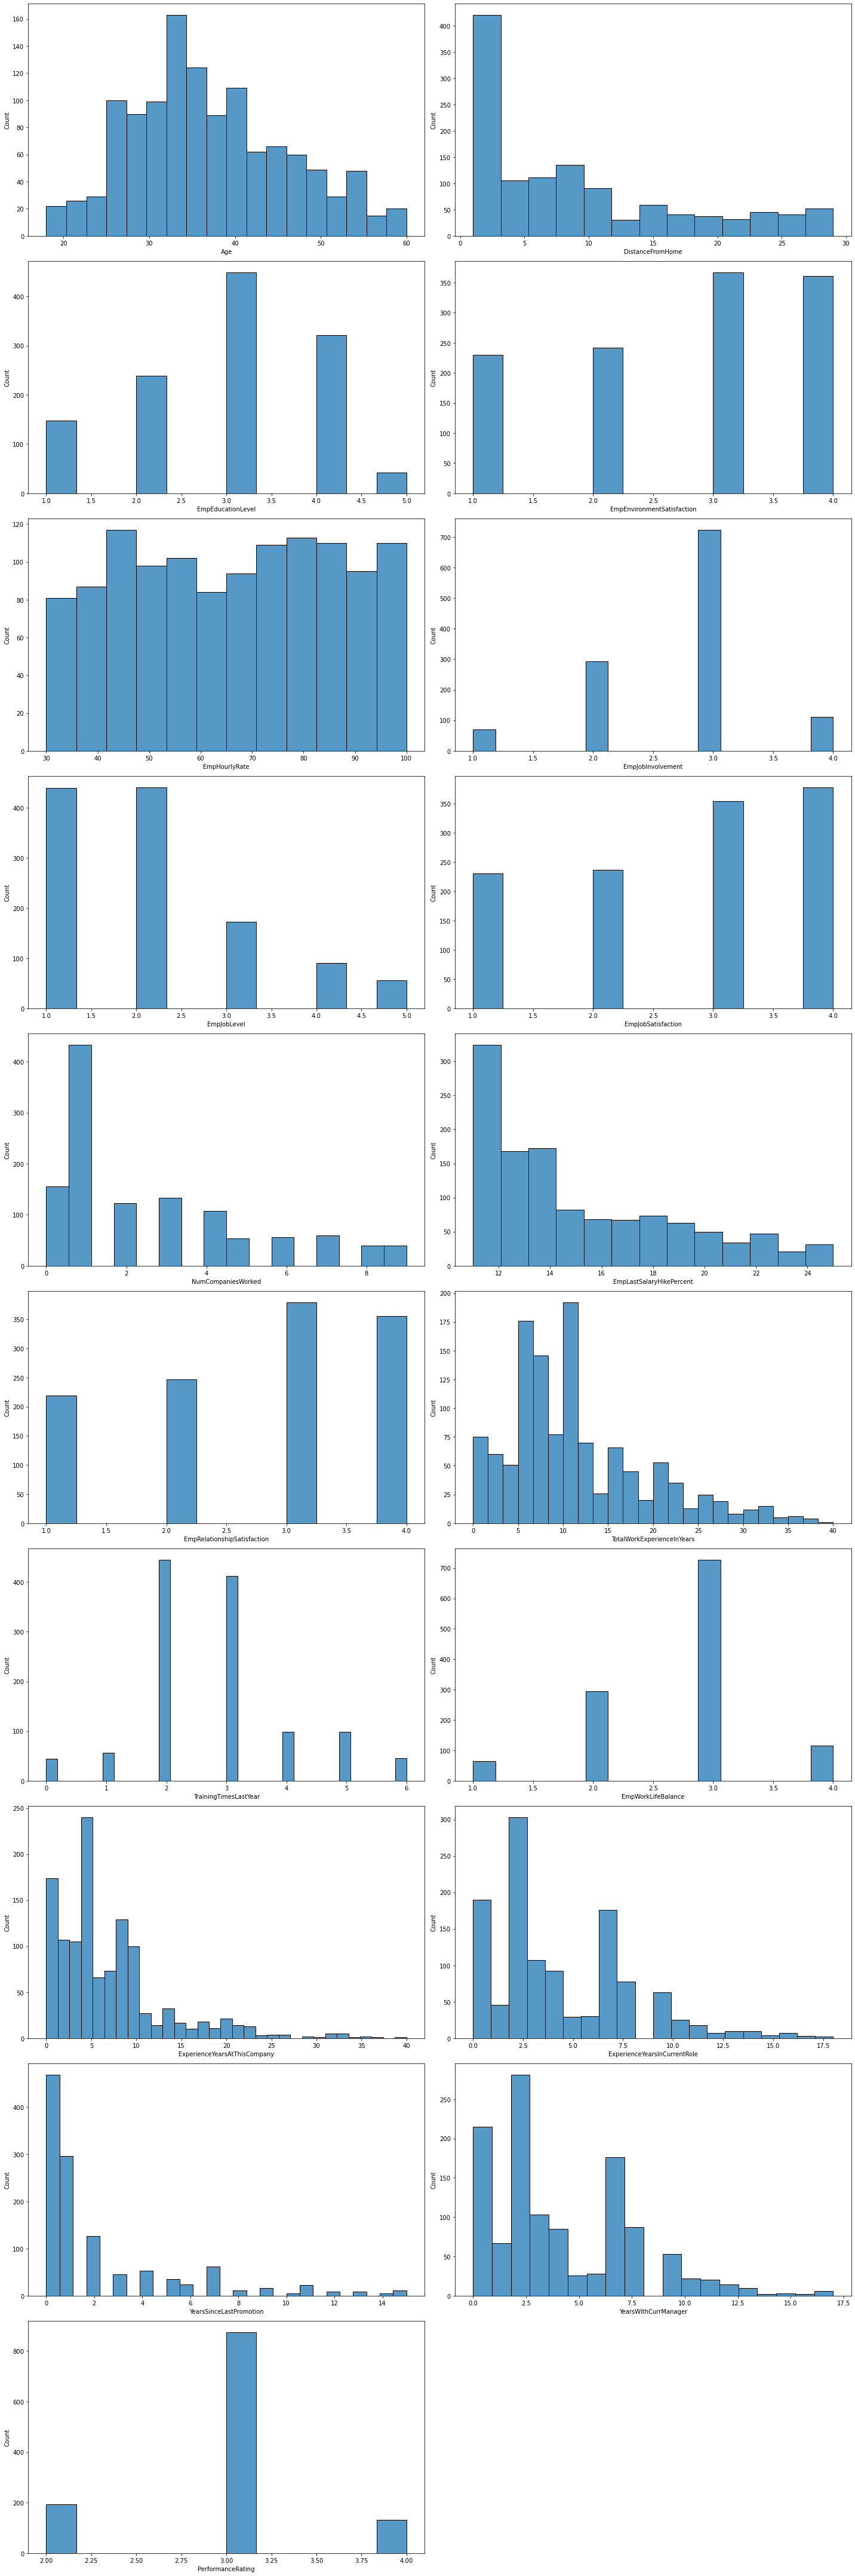

In [4]:
#univariant analysis of Numerical feature
plt.figure(figsize=(20,60))
for i in range(0,len(numerical_feature)):
    plt.subplot(10,2,i+1)
    sns.histplot(data[numerical_feature[i]])
    plt.xlabel(numerical_feature[i])
    plt.tight_layout()

#### plt.figure(figsize=(20,60)) creates a new Matplotlib figure with a specified size (20 units in width and 60 units in height). This figure will serve as the canvas for the subplots that follow.
#### for i in range(0, len(numerical_feature)):  initiates a loop that iterates through the list of numerical features i previously identified (stored in the 'numerical_feature' list).
#### plt.subplot(10,2,i+1) Within the loop, this line creates a subplot within the figure. It uses a 10x2 grid layout for subplots (10 rows and 2 columns) and places each subplot at position 'i+1'. The 'i+1' is used to ensure that each numerical feature gets its own subplot.
#### sns.histplot(data[numerical_feature[i]]) uses Seaborn to create a histogram plot for the current numerical feature
#### plt.xlabel(numerical_feature[i])  adds a label (xlabel) to the subplot, indicating the name of the numerical feature being analyzed.
#### plt.tight_layout() ensures that the subplots are properly arranged and spaced within the figure.

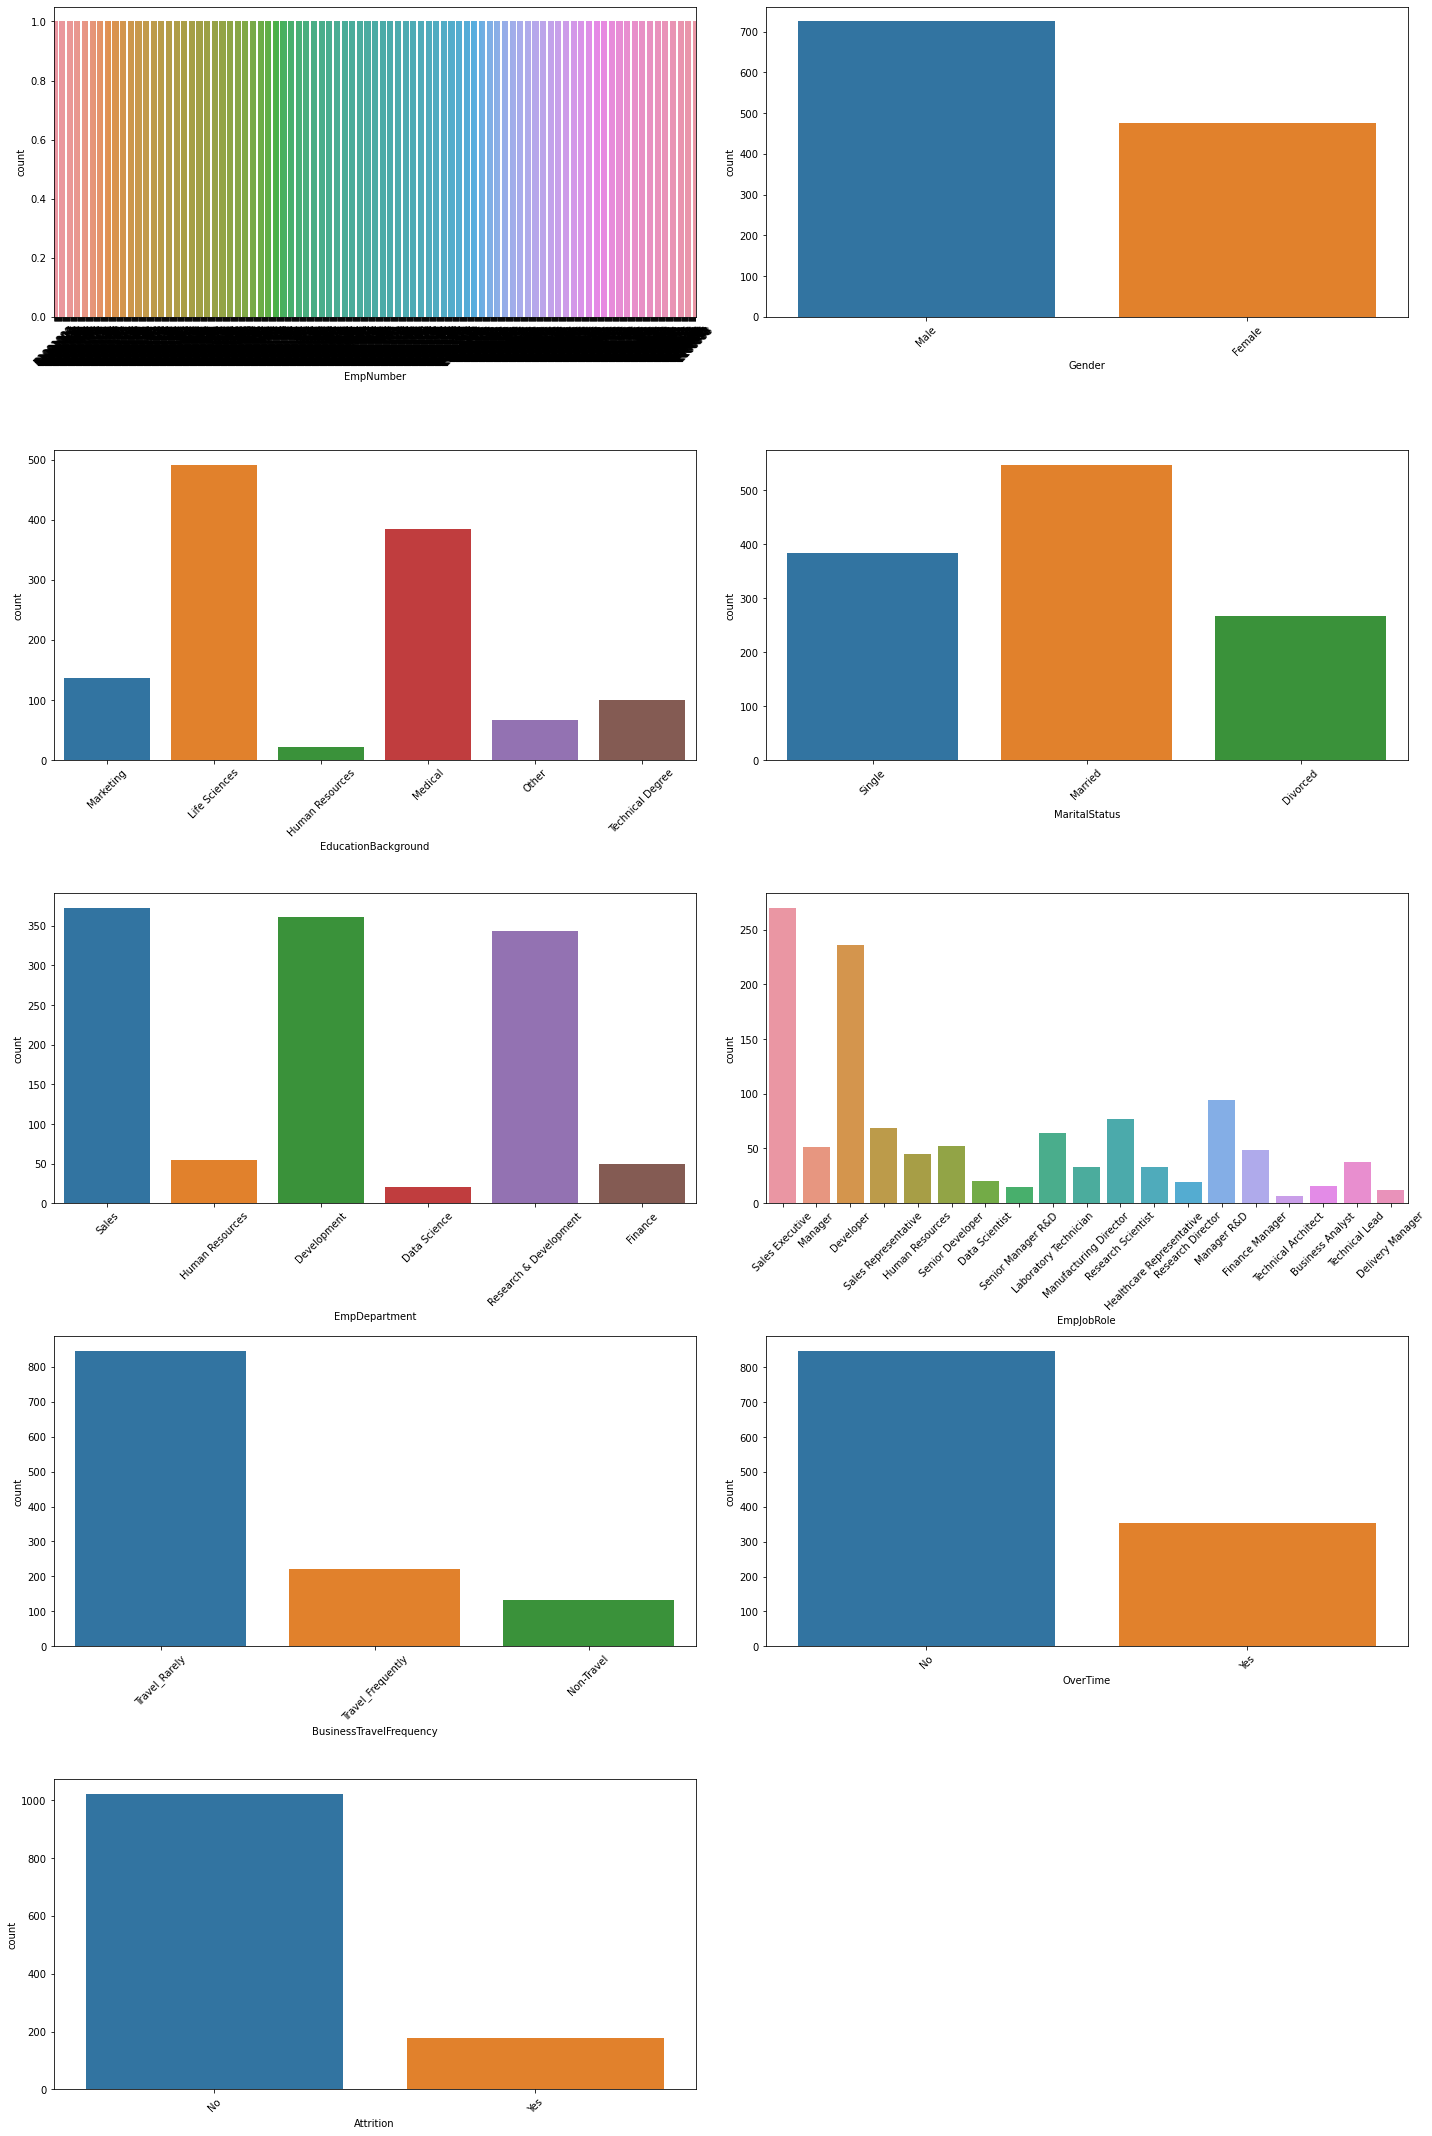

In [5]:
#univariant analysis of categorical feature
plt.figure(figsize=(20,60))
for i in range(0,len(categorical_feature)):
    plt.subplot(10,2,i+1)
    sns.countplot(data[categorical_feature[i]])
    plt.xlabel(categorical_feature[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

#### sns.countplot(data[categorical_feature[i]]) uses Seaborn to create a countplot for the current categorical feature. A countplot displays the frequency of each category in the categorical variable.
#### plt.xticks(rotation=45) This line rotates the x-axis (category labels) by 45 degrees to improve readability when dealing with long category names.

## Department wise Performance

In [6]:
# A new pandas Dataframe is created to analyze department wise performance as asked.
dept=data.loc[:,['EmpDepartment','PerformanceRating']]
dept

EmpDepartment  PerformanceRating
0               Sales                  3
1               Sales                  3
2               Sales                  4
3     Human Resources                  3
4               Sales                  3
...               ...                ...
1195            Sales                  4
1196      Development                  3
1197      Development                  3
1198     Data Science                  3
1199            Sales                  2

[1200 rows x 2 columns]

#### The above code  uses the .loc method to select specific columns from the 'data' DataFrame. In this case, it selects two columns: 'EmpDepartment' and 'PerformanceRating'.The selected columns are placed in a new DataFrame called 'dept'. This new DataFrame, 'dept', contains only the 'EmpDepartment' and 'PerformanceRating' columns from the original dataset which I can use for further analysis or visualization related to employee departments and performance ratings.

In [7]:
# Finding out the mean performance of all the departments and plotting its bar graph using seaborn.
dept.groupby(by='EmpDepartment').mean()

PerformanceRating
EmpDepartment                            
Data Science                     3.050000
Development                      3.085873
Finance                          2.775510
Human Resources                  2.925926
Research & Development           2.921283
Sales                            2.860590

#### .groupby(by='EmpDepartment') is a Pandas method that groups the rows in the 'dept' DataFrame based on the values in the 'EmpDepartment' column. This means that all rows with the same 'EmpDepartment' value will be grouped together.
#### .mean() is then applied to each group. It calculates the mean (average) value for each numerical column within each group. In this case, it calculates the mean of the 'PerformanceRating' column for each department group.

<AxesSubplot:xlabel='EmpDepartment', ylabel='PerformanceRating'>

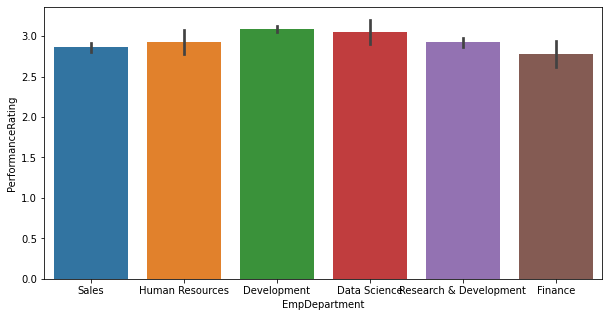

In [8]:
# departement wise performance
plt.figure(figsize=(10,5))
sns.barplot(dept.EmpDepartment,dept.PerformanceRating)

#### dept.EmpDepartment: This is the x-axis (horizontal axis) of the bar plot and represents the different employee departments. It's the categorical variable.
#### dept.PerformanceRating: This is the y-axis (vertical axis) of the bar plot and represents the average performance ratings for each department. It's the numerical variable.
#### The sns.barplot function will automatically calculate and display the average performance rating for each department as a bar on the plot.

In [9]:
#analyse each department seperately
dept.groupby(by='EmpDepartment')['EmpDepartment'].value_counts()

EmpDepartment           EmpDepartment         
Data Science            Data Science               20
Development             Development               361
Finance                 Finance                    49
Human Resources         Human Resources            54
Research & Development  Research & Development    343
Sales                   Sales                     373
Name: EmpDepartment, dtype: int64

#### It counts the number of occurrences of each unique value in the 'EmpDepartment' column within each group. Essentially, it counts how many times each department appears in the 'EmpDepartment' column for each group.

In [10]:
# Creating a new dataframe to analyze each department separately
department=pd.get_dummies(dept.EmpDepartment)
performance=pd.DataFrame(data.PerformanceRating)
dept_rating=pd.concat([department,performance],axis=1)
dept_rating

Data Science  Development  Finance  Human Resources  \
0                0            0        0                0   
1                0            0        0                0   
2                0            0        0                0   
3                0            0        0                1   
4                0            0        0                0   
...            ...          ...      ...              ...   
1195             0            0        0                0   
1196             0            1        0                0   
1197             0            1        0                0   
1198             1            0        0                0   
1199             0            0        0                0   

      Research & Development  Sales  PerformanceRating  
0                          0      1                  3  
1                          0      1                  3  
2                          0      1                  4  
3                          0      0                  3  
4                          0      1                  3  
...                      ...    ...                ...  
1195                       0      1                  4  
1196                       0      0                  3  
1197                       0      0                  3  
1198                       0      0                  3  
1199                       0      1                  2  

[1200 rows x 7 columns]

#### pd.get_dummies(dept.EmpDepartment) creates dummy variables (binary columns) for each unique department in the 'EmpDepartment' column. Each department gets its own column, and if an employee belongs to that department, the corresponding column will have a value of 1, and 0 otherwise.
#### pd.DataFrame(data.PerformanceRating) creates a new DataFrame called 'performance' containing only the 'PerformanceRating' column.
#### pd.concat([department, performance], axis=1) concatenates (combines) the 'department' DataFrame (dummy variables for employee departments) and the 'performance' DataFrame (performance ratings) along the columns (axis=1). This results in a new DataFrame called 'dept_rating' where we have both the department information and performance ratings side by side.

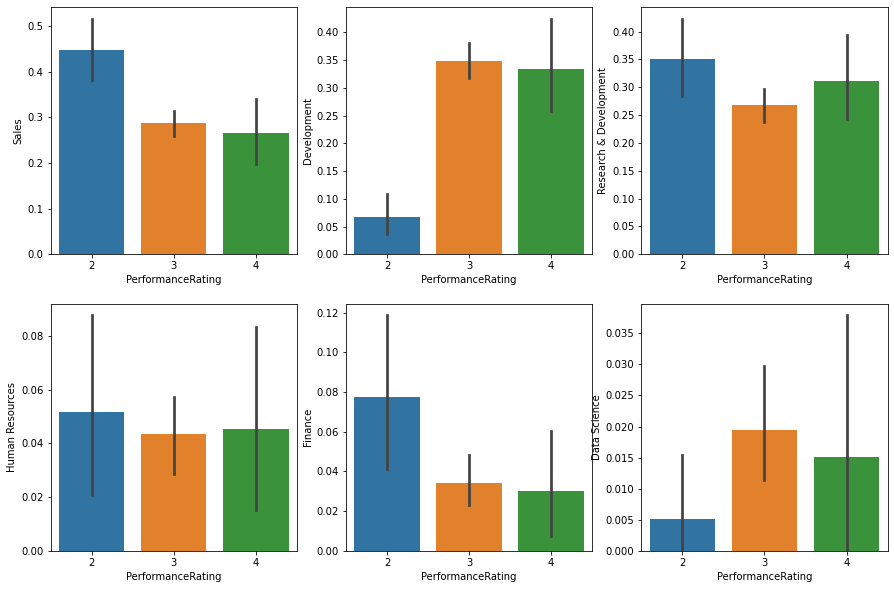

In [11]:
# Plotting a separate bar graph for performance of each department using seaborn
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Sales'])
plt.subplot(2,3,2)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Development'])
plt.subplot(2,3,3)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Research & Development'])
plt.subplot(2,3,4)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Human Resources'])
plt.subplot(2,3,5)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Finance'])
plt.subplot(2,3,6)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Data Science'])
plt.show()

#### plt.subplot(2,3,1) -This lines create a subplot within the figure. They specify a grid layout with 2 rows and 3 columns of subplots, and the current subplot is in the first position
#### The end result is a grid of bar plots, each illustrating how performance ratings are distributed within different employee departments. This visualization allows us to compare the performance ratings across departments visually.

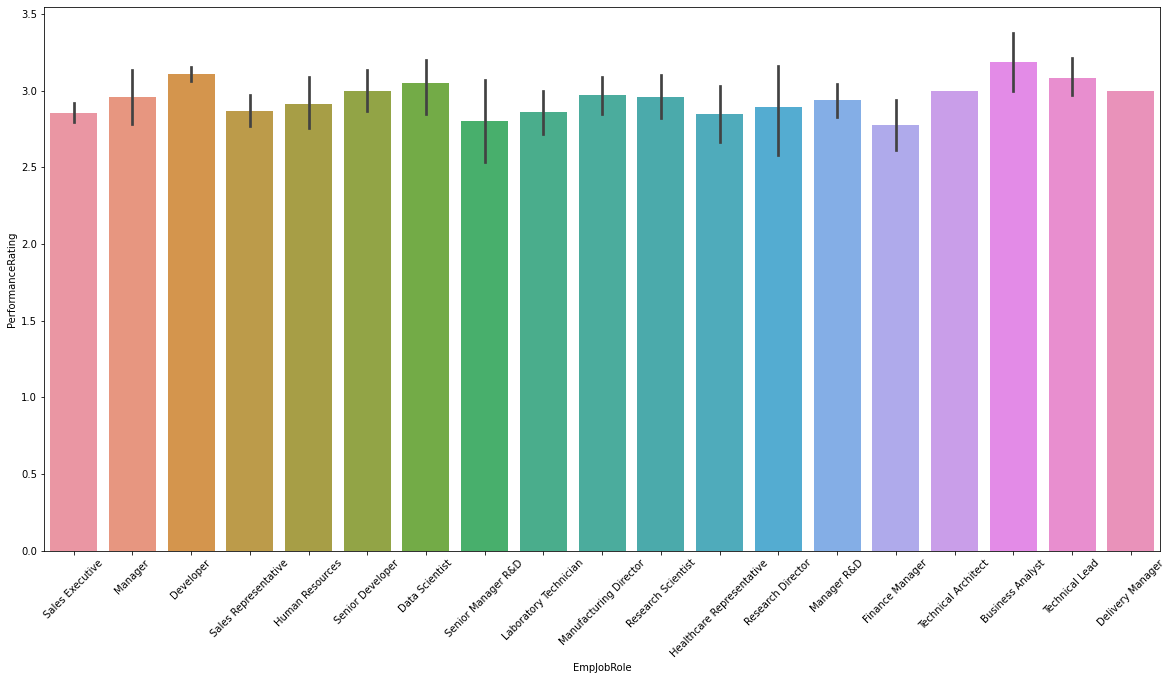

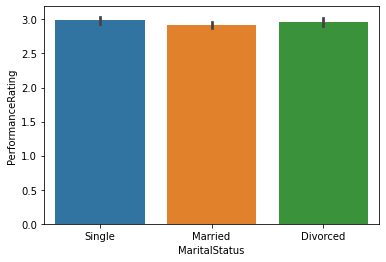

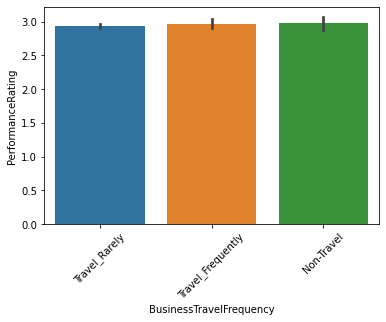

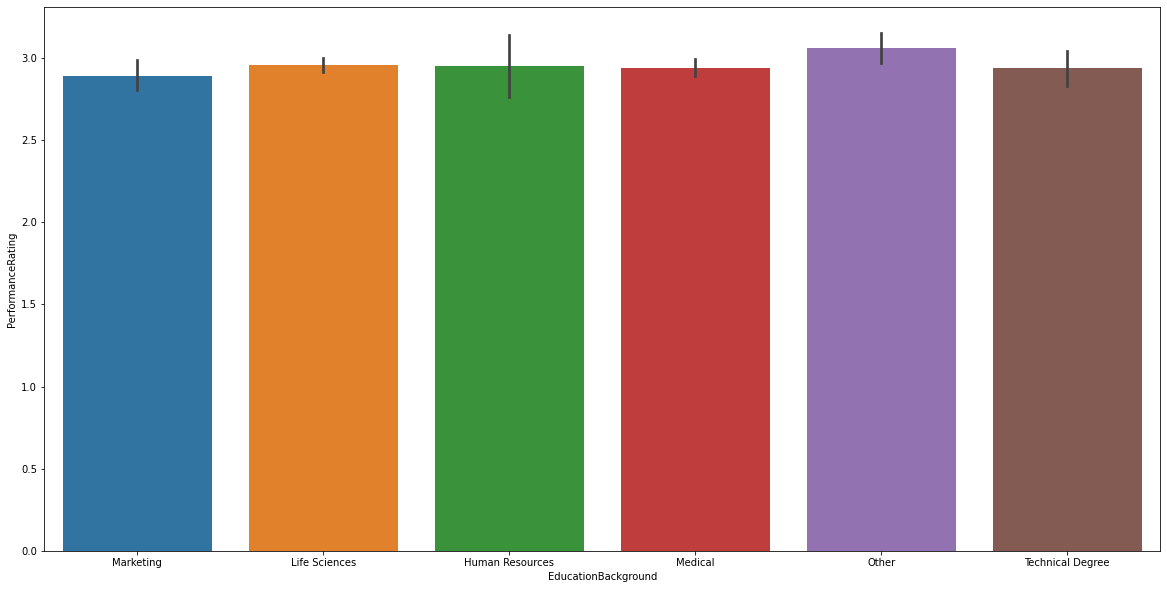

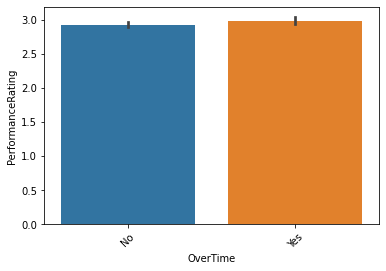

<AxesSubplot:xlabel='Attrition', ylabel='PerformanceRating'>

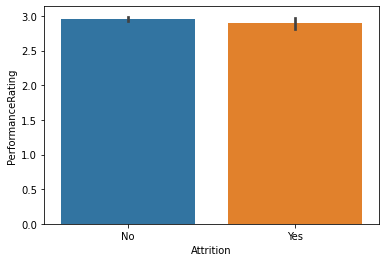

In [12]:
plt.figure(figsize=(20,10))
sns.barplot(data.EmpJobRole,data.PerformanceRating)
plt.xticks(rotation=45)
plt.show()
sns.barplot(data.MaritalStatus,data.PerformanceRating)
plt.show()
sns.barplot(data.BusinessTravelFrequency,data.PerformanceRating)
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(20,10))
sns.barplot(data.EducationBackground,data.PerformanceRating)
plt.show()
sns.barplot(data.OverTime,data.PerformanceRating)
plt.xticks(rotation=45)
plt.show()
sns.barplot(data.Attrition,data.PerformanceRating)

#### Employees who are business analyst, technical lead, data scientist, developer have performed well performance rating of employee does not vary with Marital status employee who do overtime have rated as more as compared to those who doesn't do overtime.

<AxesSubplot:xlabel='Gender', ylabel='EmpHourlyRate'>

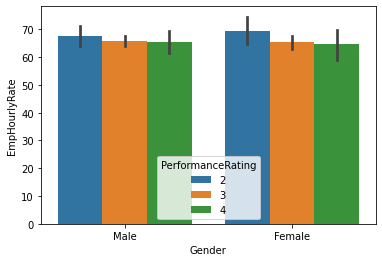

In [13]:
sns.barplot(data.Gender,data.EmpHourlyRate,hue=data.PerformanceRating)

#### The result is a bar plot where each bar represents a gender category, and the height of the bar corresponds to the average hourly rate for that gender. The bars are further colored based on performance ratings, allowing you to see how performance ratings vary within each gender category. This visualization can provide insights into how hourly rates and performance ratings are distributed across different genders.

In [14]:
data.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

<AxesSubplot:xlabel='Gender', ylabel='count'>

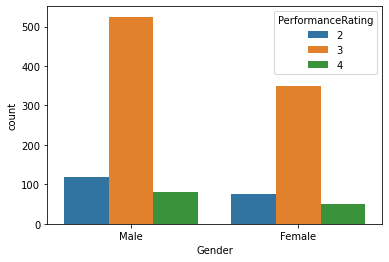

In [15]:
sns.countplot(data.Gender,hue=data.PerformanceRating)

#### The result is a count plot where each bar represents a gender category, and the height of the bar corresponds to the count (frequency) of employees with a specific performance rating within that gender category. This visualization helps us understand how performance ratings are distributed among different genders, providing insights into any performance rating disparities, if present.

<AxesSubplot:xlabel='EducationBackground', ylabel='Age'>

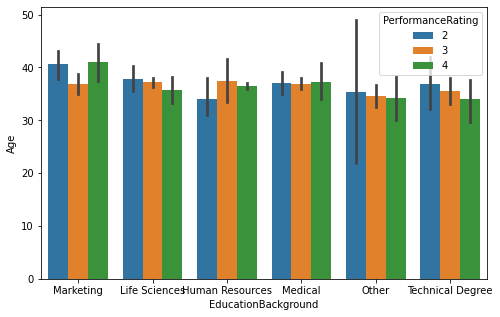

In [16]:
plt.figure(figsize=(8,5))
sns.barplot(data.EducationBackground,data.Age,hue=data.PerformanceRating)

#### The result is a bar plot where each bar represents an education background category, and the height of the bar corresponds to the average age for that education background. The bars are further colored based on performance ratings, allowing us to see how performance ratings vary within each education background category. This visualization can provide insights into how age, education backgrounds, and performance ratings are related.

<AxesSubplot:xlabel='EducationBackground', ylabel='count'>

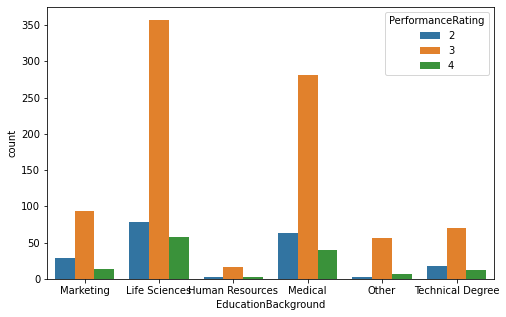

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(data.EducationBackground,hue=data.PerformanceRating)

#### The result is a count plot where each bar represents an education background category, and the height of the bar corresponds to the count (frequency) of employees with a specific performance rating within that education background category. This visualization helps us understand how performance ratings are distributed among different education backgrounds, providing insights into any patterns or disparities in performance ratings based on education background.

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

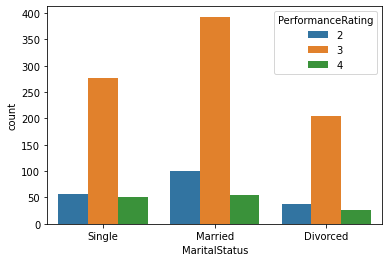

In [18]:
sns.countplot(data.MaritalStatus,hue=data.PerformanceRating)

#### The result is a count plot where each bar represents a marital status category, and the height of the bar corresponds to the count (frequency) of employees with a specific performance rating within that marital status category. This visualization helps us understand how performance ratings are distributed among employees with different marital statuses, providing insights into any patterns or disparities in performance ratings based on marital status.

<AxesSubplot:xlabel='EmpDepartment', ylabel='count'>

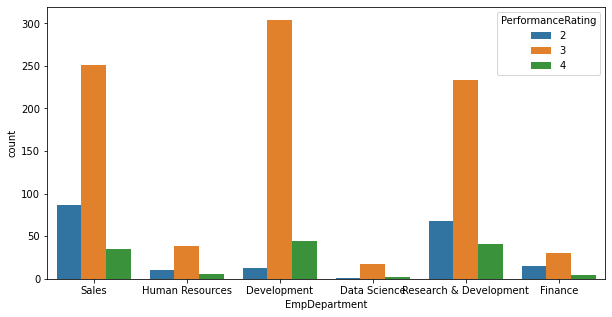

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(data.EmpDepartment,hue=data.PerformanceRating)

#### The result is a count plot where each bar represents a department, and the height of the bar corresponds to the count (frequency) of employees with a specific performance rating within that department. This visualization helps us understand how performance ratings are distributed among different departments in the organization, providing insights into department-specific performance characteristics.

<AxesSubplot:xlabel='BusinessTravelFrequency', ylabel='count'>

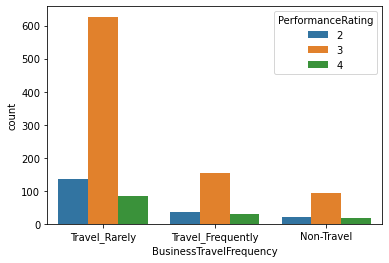

In [20]:
sns.countplot(data.BusinessTravelFrequency,hue=data.PerformanceRating)

#### The result is a count plot where each bar represents a business travel frequency category, and the height of the bar corresponds to the count (frequency) of employees with a specific performance rating within that category. This visualization helps us understand how performance ratings are distributed among employees with different levels of business travel frequency, providing insights into performance characteristics related to travel.

<AxesSubplot:xlabel='OverTime', ylabel='count'>

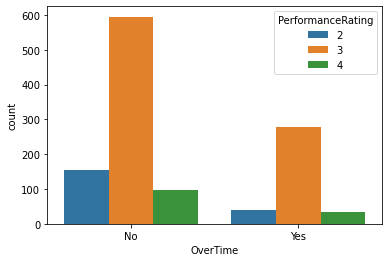

In [21]:
sns.countplot(data.OverTime,hue=data.PerformanceRating)

#### The result is a count plot where you have two bars (one for "Yes" and one for "No"), and each bar is further divided by performance rating. The height of the bars corresponds to the count (frequency) of employees with specific performance ratings within each overtime category. This visualization helps us understand how performance ratings are distributed among employees who work overtime and those who do not, providing insights into performance characteristics related to overtime work.

<AxesSubplot:xlabel='Gender', ylabel='DistanceFromHome'>

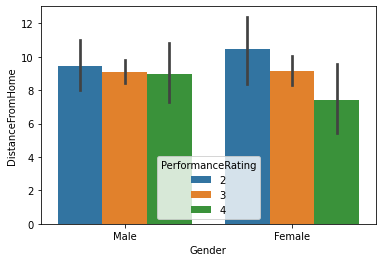

In [22]:
sns.barplot(data.Gender,data.DistanceFromHome,hue=data.PerformanceRating)

#### The result is a bar plot where you have two bars (one for each gender category, e.g., "Male" and "Female"), and each bar is divided by performance rating. The height of the bars corresponds to the average distance from home for employees of that gender, and the bars are colored based on performance ratings. This visualization helps us understand how the distance from home and gender may be related to performance ratings.

In [23]:
data.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

<AxesSubplot:xlabel='Attrition', ylabel='count'>

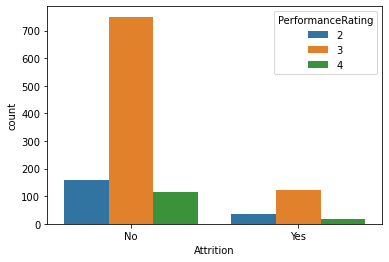

In [24]:
sns.countplot(data.Attrition,hue=data.PerformanceRating)

#### The result is a count plot where you have two bars (one for "Yes" and one for "No"), and each bar is further divided by performance rating. The height of the bars corresponds to the count (frequency) of employees with specific performance ratings within each attrition category. This visualization helps us understand how performance ratings are distributed among employees who have experienced attrition and those who have not, providing insights into the relationship between attrition and performance.

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='count'>

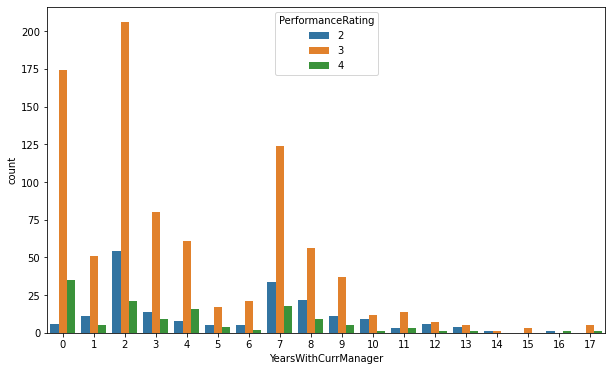

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(data.YearsWithCurrManager,hue=data.PerformanceRating)

#### The result is a count plot where you have bars representing different categories of years with the current manager, and each bar is further divided by performance rating. The height of the bars corresponds to the count (frequency) of employees with specific performance ratings within each category of years with their current manager. This visualization helps us understand how performance ratings are distributed based on the length of time employees have been working with their current manager.

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='count'>

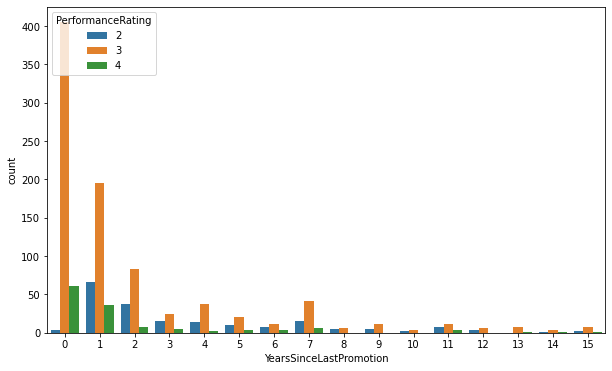

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(data.YearsSinceLastPromotion,hue=data.PerformanceRating)

#### The result is a count plot where you have bars representing different categories of years since the last promotion, and each bar is further divided by performance rating. The height of the bars corresponds to the count (frequency) of employees with specific performance ratings within each category of years since their last promotion. This visualization helps us understand how performance ratings are distributed based on the time since employees' last promotion.

<AxesSubplot:xlabel='EmpWorkLifeBalance', ylabel='count'>

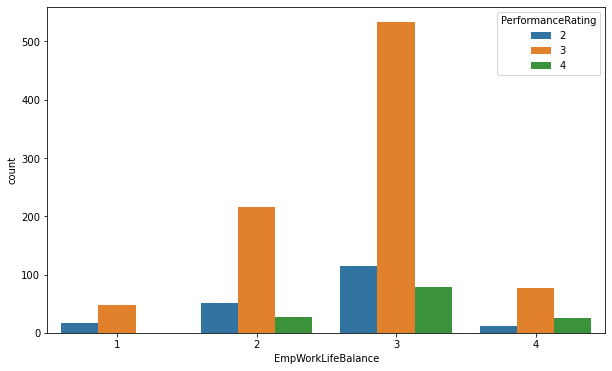

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(data.EmpWorkLifeBalance,hue=data.PerformanceRating)

#### The result is a count plot where you have bars representing different categories of work-life balance, and each bar is further divided by performance rating. The height of the bars corresponds to the count (frequency) of employees with specific performance ratings within each category of work-life balance. This visualization helps us understand how performance ratings are distributed based on employees' perceptions of their work-life balance.

<AxesSubplot:xlabel='EmpRelationshipSatisfaction', ylabel='count'>

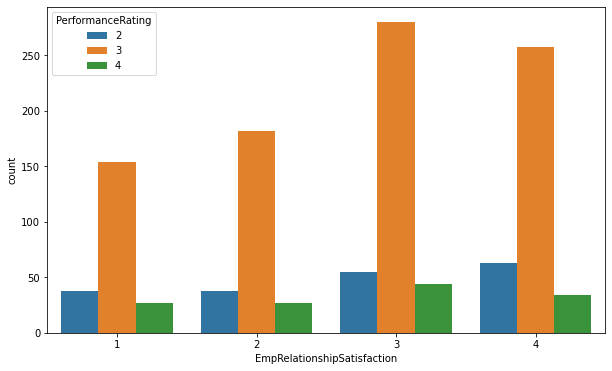

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(data.EmpRelationshipSatisfaction,hue=data.PerformanceRating)

#### The result is a count plot where you have bars representing different categories of relationship satisfaction, and each bar is further divided by performance rating. The height of the bars corresponds to the count (frequency) of employees with specific performance ratings within each category of relationship satisfaction. This visualization helps us understand how performance ratings are distributed based on employees' perceptions of their relationship satisfaction.

<AxesSubplot:xlabel='TotalWorkExperienceInYears', ylabel='count'>

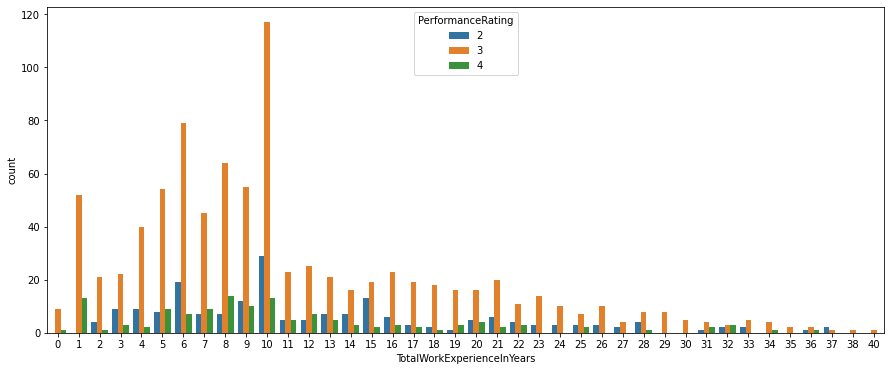

In [29]:
plt.figure(figsize=(15,6))
sns.countplot(data.TotalWorkExperienceInYears,hue=data.PerformanceRating)

#### The result is a count plot where you have bars representing different categories or ranges of total work experience, and each bar is further divided by performance rating. The height of the bars corresponds to the count (frequency) of employees with specific performance ratings within each category of total work experience. This visualization helps us understand how performance ratings are distributed based on employees' total work experience.

#### When total work experience of employee is above 10 year the performace of employee drops

<AxesSubplot:xlabel='EmpLastSalaryHikePercent', ylabel='count'>

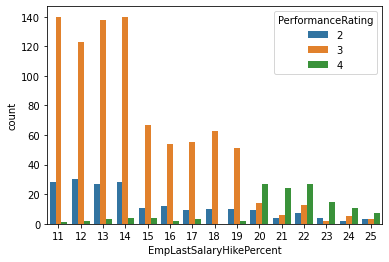

In [30]:
sns.countplot(data.EmpLastSalaryHikePercent,hue=data.PerformanceRating)

#### when the employee got salary hike of more than 19%, the performce of employee increased. thus, employee performace depends on the salary hike given by the company. employee with higher salary hike percentage has performed well.

<AxesSubplot:xlabel='EmpJobLevel', ylabel='EmpEnvironmentSatisfaction'>

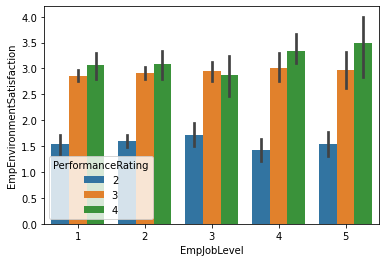

In [31]:
sns.barplot(data.EmpJobLevel,data.EmpEnvironmentSatisfaction,hue=data.PerformanceRating)

#### The result is a bar plot where you have bars representing different job levels on the x-axis, environmental satisfaction on the y-axis, and each bar is further divided by performance rating. The height of the bars corresponds to the average environmental satisfaction score for employees in each job level, and the bars are colored based on performance ratings. This visualization helps us understand how environmental satisfaction varies across different job levels and its association with performance ratings.

<AxesSubplot:xlabel='EmpDepartment', ylabel='DistanceFromHome'>

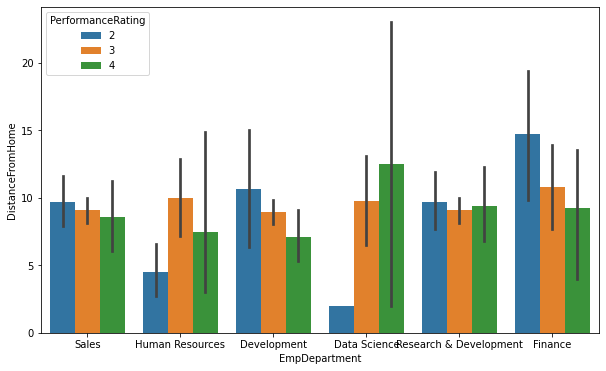

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(data.EmpDepartment,data.DistanceFromHome,hue=data.PerformanceRating)

#### The result is a bar plot where you have bars representing different departments on the x-axis, average distance from home on the y-axis, and each bar is further divided by performance rating. The height of the bars corresponds to the average distance from home for employees in each department, and the bars are colored based on performance ratings. This visualization helps us understand how distance from home varies across different departments and its association with performance ratings.

<AxesSubplot:xlabel='EducationBackground', ylabel='EmpEducationLevel'>

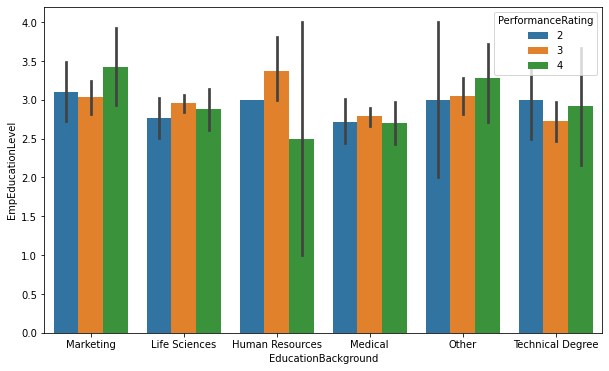

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(data.EducationBackground,data.EmpEducationLevel,hue=data.PerformanceRating)

#### The result is a bar plot where you have bars representing different education backgrounds on the x-axis, education levels on the y-axis, and each bar is further divided by performance rating. The height of the bars corresponds to the average education level for employees in each education background category, and the bars are colored based on performance ratings. This visualization helps us understand how education levels vary across different education backgrounds and their association with performance ratings.

In [34]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [35]:
import plotly.express as px
fig = px.pie(data, values='EmpJobSatisfaction', names= 'PerformanceRating', color= 'EmpJobInvolvement',
            title = 'Performance rating as per job involvement & job satisfaction',width=600, height=400)
fig.show()

#### This line displays the generated pie chart. The chart visually represents how performance ratings are distributed among different job involvement levels, and it further differentiates the segments by job satisfaction levels.

#### We can see that 11% and 16.3% of employees having low job satisfaction and job involvement have low performance ratings

In [36]:
#Employee last salary hike percent
pd.crosstab(data['EmpLastSalaryHikePercent'],data['PerformanceRating'],margins=True)

PerformanceRating           2    3    4   All
EmpLastSalaryHikePercent                     
11                         28  140    1   169
12                         30  123    2   155
13                         27  138    3   168
14                         28  140    4   172
15                         11   67    4    82
16                         12   54    2    68
17                          9   55    3    67
18                         10   63    0    73
19                         10   51    2    63
20                          9   14   27    50
21                          4    6   24    34
22                          7   13   27    47
23                          4    2   15    21
24                          2    5   11    18
25                          3    3    7    13
All                       194  874  132  1200

#### margins=True includes row and column margins in the cross-tabulation. Row margins are subtotals for each row, and column margins are subtotals for each column.
#### The result is a table that shows the counts or frequencies of combinations of 'EmpLastSalaryHikePercent' and 'PerformanceRating'. It allows you to see how performance ratings are distributed among different percentage ranges of the last salary hike. The row and column margins provide total counts for reference. This type of analysis can help identify any patterns or relationships between salary hikes and performance ratings.

In [37]:
# 3.Employee Work life balance
pd.crosstab(data['EmpWorkLifeBalance'],data['PerformanceRating'],margins=True)

PerformanceRating     2    3    4   All
EmpWorkLifeBalance                     
1                    16   48    0    64
2                    51  216   27   294
3                   115  533   79   727
4                    12   77   26   115
All                 194  874  132  1200

#### The result is a table that shows the counts or frequencies of combinations of 'EmpWorkLifeBalance' and 'PerformanceRating'. It allows us to see how performance ratings are distributed among different levels of self-reported work-life balance. The row and column margins provide total counts for reference. This type of analysis can help identify any patterns or relationships between work-life balance and performance ratings.

In [38]:
percent = pd.crosstab(data["PerformanceRating"], data["EmpDepartment"], margins=True,normalize=True)
round(percent.multiply(100),2)

EmpDepartment      Data Science  Development  Finance  Human Resources  \
PerformanceRating                                                        
2                          0.08         1.08     1.25             0.83   
3                          1.42        25.33     2.50             3.17   
4                          0.17         3.67     0.33             0.50   
All                        1.67        30.08     4.08             4.50   

EmpDepartment      Research & Development  Sales     All  
PerformanceRating                                         
2                                    5.67   7.25   16.17  
3                                   19.50  20.92   72.83  
4                                    3.42   2.92   11.00  
All                                 28.58  31.08  100.00

#### normalize=True calculates the percentages in the cross-tabulation. It normalizes the counts to show the distribution of performance ratings within each department.
#### percent.multiply(100) multiplies all the values in the 'percent' table by 100 to convert them from fractions to percentages.
#### round(..., 2) rounds the percentages to two decimal places for better readability.
#### The result is a table that shows the percentage distribution of performance ratings across different employee departments. This type of analysis helps us understand how performance ratings are distributed within each department, providing insights into department-specific performance characteristics.

#### So from the below data we got clear indication of those employees who have low performance, low job involvement and have less or equal to 2 years of experience.

In [39]:
# Filtering those employees whose performance rating is low but working in thiscompany for less or equal to 2 years
low_per=data.loc[(data['PerformanceRating']==2) & (data['Attrition']=='No')& (data['EmpJobInvolvement']<= 2)& 
                 (data['ExperienceYearsAtThisCompany'] <= 2),['EmpNumber','ExperienceYearsAtThisCompany',
                                                              'EmpJobInvolvement','Attrition','PerformanceRating']]
low_per

EmpNumber  ExperienceYearsAtThisCompany  EmpJobInvolvement Attrition  \
165   E1001300                             2                  2        No   
182   E1001322                             2                  2        No   
605   E1002079                             2                  2        No   
728   E1002291                             2                  2        No   
878    E100461                             2                  2        No   
1023   E100702                             2                  2        No   

      PerformanceRating  
165                   2  
182                   2  
605                   2  
728                   2  
878                   2  
1023                  2

#### data['PerformanceRating'] == 2 filters employees with a performance rating of 2, which represents low performance.

#### data['Attrition'] == 'No' filters employees who have not experienced attrition (i.e., they have not left the company).

#### data['EmpJobInvolvement'] <= 2 filters employees with a job involvement score of 2 or less. This suggests lower job involvement.

#### data['ExperienceYearsAtThisCompany'] <= 2 filters employees with two or fewer years of experience at the company.
#### The result in the low_per DataFrame contains information about employees who meet these specific criteria, such as low performance ratings, no attrition, low job involvement, and limited experience at the company. This type of filtering can be useful for targeted analysis or interventions related to employee performance improvement.

#### So, As per our Goal--2, those 6 non performing employees can be penalized or given final warning for their performance.

In [40]:
data.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

#### From above visualization, we can clearly observe that Salary hike, Environment satisfaction,Job satisfaction, Employee experience marked great impact on Performance ratings. So, from management side, they need to look after in these matters to increase the employees performance

## Checking Distribution of Numerical Features

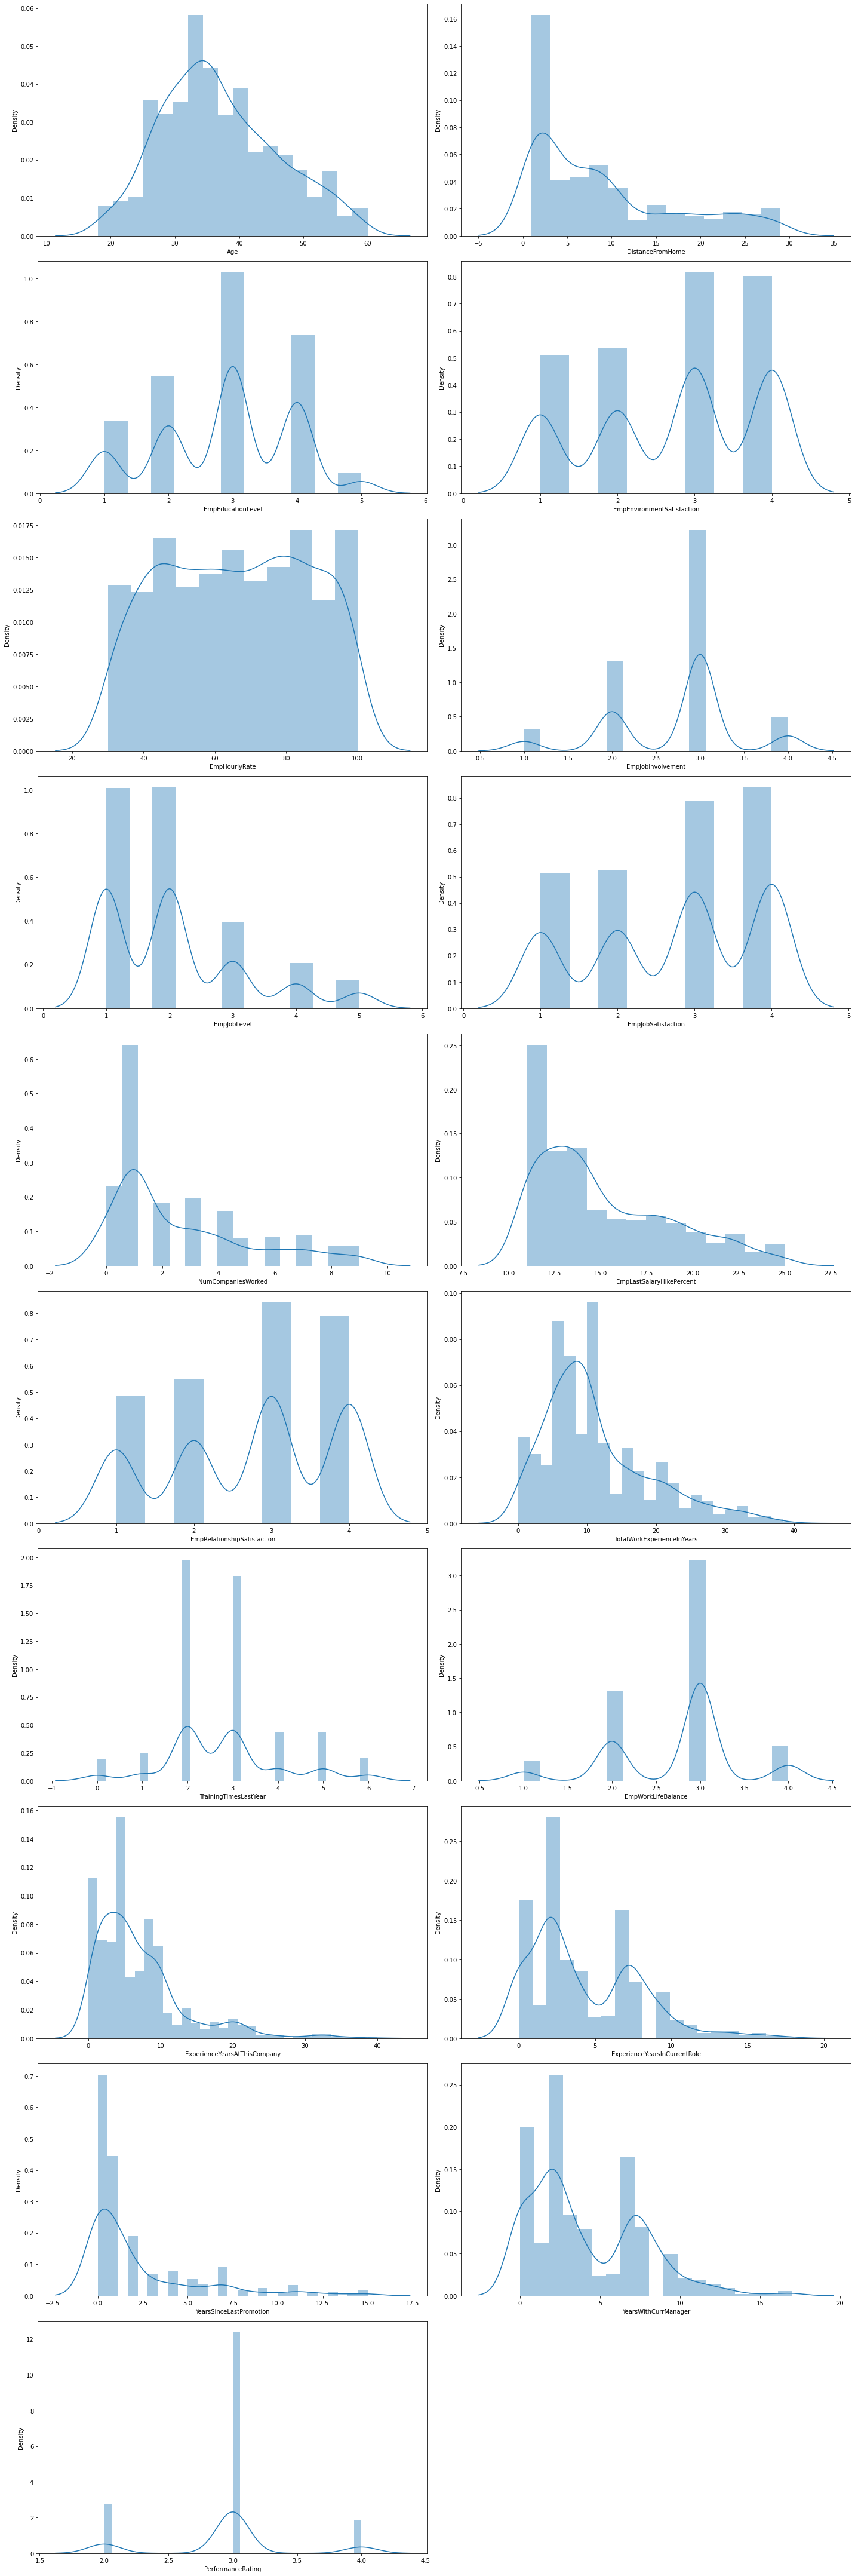

In [41]:
plt.figure(figsize=(20,60))
for i in range(0,len(numerical_feature)):
    plt.subplot(10,2,i+1)
    sns.distplot(data[numerical_feature[i]])
    plt.xlabel(numerical_feature[i])
    plt.tight_layout()

#### The for loop iterates over each numerical feature in the numerical_feature list.

#### plt.subplot(10, 2, i + 1) specifies the arrangement of subplots in a 10x2 grid, where each numerical feature is represented in a separate subplot.

#### sns.distplot(data[numerical_feature[i]]) creates a distribution plot (histogram) for the current numerical feature using Seaborn's distplot function. It visualizes the distribution of values for that feature.

#### plt.xlabel(numerical_feature[i]) sets the label for the x-axis of the current subplot to the name of the numerical feature.
#### The result is a set of distribution plots, each showing the probability distribution of a specific numerical feature from the dataset. These plots provide insights into the data's distribution characteristics, such as skewness, central tendency, and spread.

## Data Munging/Data Wrangling

### Checking Null values

In [42]:
#checking null values in our data
data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

## Encoding Categorical feature to Numerical

In [43]:
#Encoding categorical feature to numerical  
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for i in (2,3,4,5,6,7,16,26):
    data.iloc[:,i]=label.fit_transform(data.iloc[:,i])
data.head()

EmpNumber  Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0  E1001000   32       1                    2              2              5   
1  E1001006   47       1                    2              2              5   
2  E1001007   40       1                    1              1              5   
3  E1001009   41       1                    0              0              3   
4  E1001010   60       1                    2              2              5   

   EmpJobRole  BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0          13                        2                10                  3   
1          13                        2                14                  4   
2          13                        1                 5                  4   
3           8                        2                10                  4   
4          13                        2                16                  4   

   ...  EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0  ...                            4                          10   
1  ...                            4                          20   
2  ...                            3                          20   
3  ...                            2                          23   
4  ...                            4                          10   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   
2                      2                   3                            18   
3                      2                   2                            21   
4                      1                   3                             2   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                             7                        0   
1                             7                        1   
2                            13                        1   
3                             6                       12   
4                             2                        2   

   YearsWithCurrManager  Attrition  PerformanceRating  
0                     8          0                  3  
1                     7          0                  3  
2                    12          0                  4  
3                     6          0                  3  
4                     2          0                  3  

[5 rows x 28 columns]

#### The for loop iterates over a specific set of column indices: 2, 3, 4, 5, 6, 7, 16, and 26. These indices likely correspond to categorical columns in the dataset.

#### data.iloc[:, i] selects the column at index i from the DataFrame data.

#### label.fit_transform(data.iloc[:, i]) applies label encoding to the selected column using the fit_transform method of the LabelEncoder instance label. This method transforms the categorical values in the column into numerical values.

#### The transformed numerical values are then assigned back to the same column in the DataFrame, effectively replacing the original categorical values with encoded numerical values.

#### The result is that the specified categorical columns in the dataset are encoded into numerical values using label encoding. This is often done to prepare categorical data for machine learning algorithms that require numerical input, as they cannot directly process categorical data.

In [44]:
data.drop('EmpNumber',axis=1,inplace=True)  #droping unique feature

#### drop is a Pandas method used to remove columns or rows from a DataFrame.

#### 'EmpNumber' is the name of the column you want to remove. In this case, it's the 'EmpNumber' column.

#### axis=1 specifies that you want to remove a column (as opposed to a row). The axis=1 indicates that you're working along columns.

#### inplace=True is used to apply the operation directly to the DataFrame data without the need to create a new DataFrame. When inplace=True, the 'EmpNumber' column is dropped from the original DataFrame, and the DataFrame is modified in place.

In [45]:
# finding skewness and kurtosis to check the normalization of feature.
from scipy import stats 
for column in data:
    skewness=stats.skew(data[column])
    kurtosis=stats.kurtosis(data[column])
    print(column,'skewness is',skewness)
    print(column,'kurtosis is',kurtosis)

Age skewness is 0.3836646110785685
Age kurtosis is -0.4342016798705739
Gender skewness is -0.42601432284230467
Gender kurtosis is -1.8185117967332127
EducationBackground skewness is 0.5513749427617737
EducationBackground kurtosis is -0.65174298239753
MaritalStatus skewness is -0.15144003526169916
MaritalStatus kurtosis is -1.119700089850293
EmpDepartment skewness is -0.40791122659206125
EmpDepartment kurtosis is -1.505003648253274
EmpJobRole skewness is -0.11151335264121637
EmpJobRole kurtosis is -1.25602866999997
BusinessTravelFrequency skewness is -1.4010025618647997
BusinessTravelFrequency kurtosis is 0.5486513912585655
DistanceFromHome skewness is 0.9617520027440261
DistanceFromHome kurtosis is -0.2460053857006934
EmpEducationLevel skewness is -0.2506601284752214
EmpEducationLevel kurtosis is -0.6379446256527972
EmpEnvironmentSatisfaction skewness is -0.30728009854747024
EmpEnvironmentSatisfaction kurtosis is -1.2055559189315166
EmpHourlyRate skewness is -0.03512091677629664
EmpHou

#### These lines print the name of the current column, its skewness value, and its kurtosis value to the console. Skewness measures the asymmetry of the data distribution, while kurtosis measures the tail behavior (peakedness or flatness) of the distribution.The result is that the code calculates and prints skewness and kurtosis statistics for each column in the dataset, providing insights into the distribution characteristics of the data.

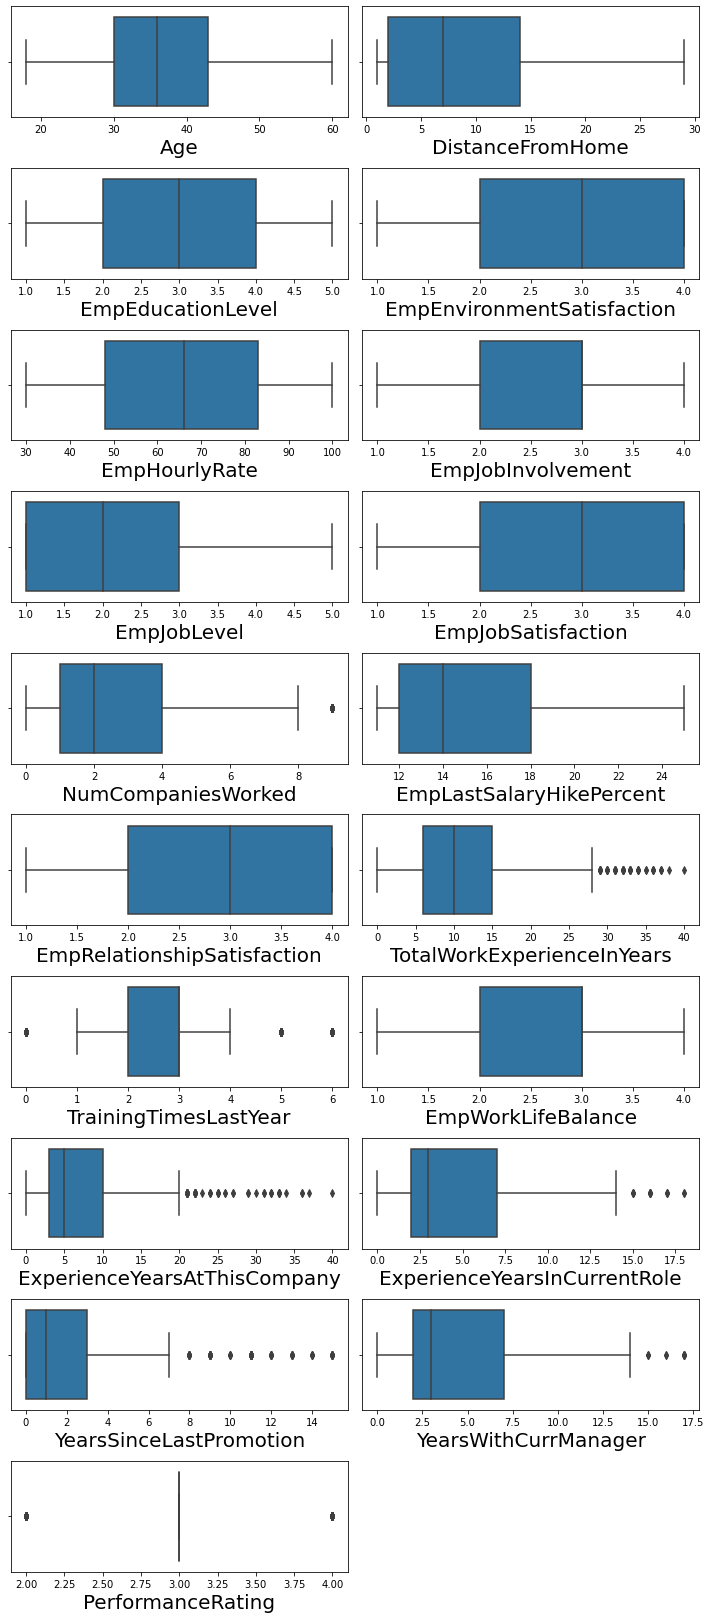

In [46]:
#checking outliers
plt.figure(figsize=(10,40))
plotnumber=1
for column in numerical_feature:
    if plotnumber<=28:
        ax=plt.subplot(18,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

#### plotnumber = 1(for column in numerical_feature:if plotnumber <= 28:)-This loop iterates over each numerical feature in the numerical_feature list. It also checks if the current plot number is within a certain limit (28 in this case) to ensure that not too many subplots are created.
#### Within the loop, plt.subplot(18, 2, plotnumber) specifies the arrangement of subplots in an 18x2 grid. Each numerical feature is represented in a separate subplot.
#### sns.boxplot(data[column]) creates a box plot for the current numerical feature using Seaborn's boxplot function. This plot visualizes the distribution, central tendency, and potential outliers of the data.
#### plt.xlabel(column, fontsize=20) sets the label for the x-axis of the current subplot to the name of the numerical feature. The fontsize parameter adjusts the label's font size.
#### plotnumber += 1- This increments the plot number to move to the next subplot.
#### The result is a set of box plots, each displaying the distribution and statistical information for a specific numerical feature in the dataset. These plots provide insights into the spread of the data, the presence of outliers, and the central tendency of each numerical feature.


#### outlier handling
#### If it is normal distribution we will use empirical rule or 3 sigma rule.
#### if it is non normal we will use IQR for removing outliers.
#### For Normal distribution the skewness and kurtosis should be in the range of -1 to 1.

In [47]:
# TotalWorkExperienceInYears is normally distributed hence we use 3 sigma rule to remove outliers
lower_limit=data.TotalWorkExperienceInYears.mean() - 3*data.TotalWorkExperienceInYears.std()##calculating lower limit
print(lower_limit)

upper_limit=data.TotalWorkExperienceInYears.mean() + 3*data.TotalWorkExperienceInYears.std()#calculating upper limit
print(upper_limit)
data.loc[data['TotalWorkExperienceInYears']<lower_limit]#checking values which are less than minimum limit
data.loc[data['TotalWorkExperienceInYears']>upper_limit]#checking values which are greater than maximum limit
display(len(data.loc[data['TotalWorkExperienceInYears']>upper_limit])/1200) #checking percent of outliers
data.loc[data['TotalWorkExperienceInYears']>upper_limit,'TotalWorkExperienceInYears']=np.mean(data.TotalWorkExperienceInYears) #imputing value with mean as outliers percentage are less than 5%
display(data.loc[data['TotalWorkExperienceInYears']>upper_limit]) #reckeck

-12.061683901117005
34.721683901117004


0.009166666666666667

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 27 columns]

In [48]:
# ExperienceYearsAtThisCompany is not normally distributed hence we use IQR rule to remove outliers
from scipy import stats
IQR = stats.iqr(data.ExperienceYearsAtThisCompany, interpolation = 'midpoint') #calculating Inter quantile range
display(IQR)
Q1=data.ExperienceYearsAtThisCompany.quantile(0.25)#defining 25% of data
Q3=data.ExperienceYearsAtThisCompany.quantile(0.75)##defining 75% of data
min_limit=Q1 - 1.5*IQR #setting minimum limit
max_limit=Q3 + 1.5*IQR #setting maximum limit
display(data.loc[data['ExperienceYearsAtThisCompany']<min_limit]) #checking values which are less than minimum limit
display(data.loc[data['ExperienceYearsAtThisCompany']>max_limit])#checking values which are greater than maximum limit
display(len(data.loc[data['ExperienceYearsAtThisCompany']>max_limit])/18278)
#imputing outlier with with median
data.loc[data['ExperienceYearsAtThisCompany']>max_limit,'ExperienceYearsAtThisCompany']=np.median(data.ExperienceYearsAtThisCompany)
data.loc[data['ExperienceYearsAtThisCompany']>max_limit] #checking whether outlier remove or not

7.0

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 27 columns]

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
3      41       1                    0              0              3   
11     47       0                    3              0              5   
25     52       1                    2              1              5   
52     47       0                    4              1              1   
100    50       1                    1              0              1   
168    39       0                    1              1              4   
175    41       0                    1              0              4   
178    52       0                    2              1              5   
181    39       0                    3              2              4   
216    42       1                    3              1              4   
252    42       1                    1              2              5   
272    46       0                    2              1              5   
304    44       1                    2              1              5   
307    45       0                    2              2              5   
308    55       1                    3              0              4   
312    51       1                    1              0              5   
316    44       1                    1              0              4   
320    43       0                    2              2              5   
347    51       1                    1              0              3   
450    50       1                    3              2              4   
459    40       1                    3              2              3   
471    53       0                    5              1              4   
475    55       1                    2              1              5   
490    50       1                    3              1              2   
492    44       0                    3              0              2   
555    45       1                    1              1              4   
557    45       0                    5              2              4   
571    40       1                    3              2              5   
613    41       0                    2              0              5   
617    47       0                    1              0              4   
642    48       1                    1              1              4   
658    48       0                    3              0              4   
777    53       0                    1              1              5   
785    44       0                    3              1              1   
816    50       0                    3              0              1   
817    59       0                    1              2              5   
838    40       1                    1              1              1   
845    58       1                    3              2              5   
862    43       1                    1              1              5   
867    58       0                    3              1              1   
911    46       0                    2              0              5   
921    52       1                    1              1              1   
956    42       1                    5              1              1   
962    52       1                    1              2              5   
978    40       1                    3              0              0   
989    55       1                    3              2              1   
1015   41       1                    1              2              5   
1024   45       1                    1              0              1   
1027   39       1                    3              1              1   
1036   39       1                    3              1              1   
1086   43       1                    1              0              1   
1094   39       1                    1              0              1   
1104   60       0                    1              1              1   
1117   50       1                    1              1              1   
1156   49       1                    1        

0.003063792537476748

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 27 columns]

In [49]:
# ExperienceYearsInCurrentRole is normally distributed hence we use 3 sigma rule to remove outliers
lower_limit=data.ExperienceYearsInCurrentRole.mean() - 3*data.ExperienceYearsInCurrentRole.std()##calculating lower limit
display(lower_limit)

upper_limit=data.ExperienceYearsInCurrentRole.mean() + 3*data.ExperienceYearsInCurrentRole.std()#calculating upper limit
display(upper_limit)
display(data.loc[data['ExperienceYearsInCurrentRole']<lower_limit])#checking values which are less than minimum limit
display(data.loc[data['ExperienceYearsInCurrentRole']>upper_limit])#checking values which are greater than maximum limit
display(len(data.loc[data['ExperienceYearsInCurrentRole']>upper_limit])/1200) #checking percent of outliers
data.loc[data['ExperienceYearsInCurrentRole']>upper_limit,'ExperienceYearsInCurrentRole']=np.mean(data.ExperienceYearsInCurrentRole) #imputing value with mean as outliers percentage are less than 5%
display(data.loc[data['ExperienceYearsInCurrentRole']>upper_limit]) #reckeck

-6.5495656709798675

15.132899004313202

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 27 columns]

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
151    41       1                    3              0              1   
175    41       0                    1              0              4   
361    56       1                    1              1              4   
639    46       0                    5              0              5   
658    48       0                    3              0              4   
730    38       0                    3              1              4   
817    59       0                    1              2              5   
864    51       1                    1              2              1   
921    52       1                    1              1              1   
956    42       1                    5              1              1   
999    42       1                    1              1              5   
1152   41       0                    1              1              5   

      EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
151            3                        1                 9   
175           11                        0                 7   
361            9                        2                23   
639           13                        2                 3   
658            8                        1                22   
730           11                        2                10   
817           13                        2                25   
864            3                        2                 6   
921            3                        2                 1   
956            3                        2                 4   
999           13                        2                 1   
1152           8                        2                 2   

      EmpEducationLevel  EmpEnvironmentSatisfaction  ...  \
151                   3                           1  ...   
175                   1                           2  ...   
361                   3                           4  ...   
639                   3                           1  ...   
658                   3                           4  ...   
730                   3                           2  ...   
817                   3                           1  ...   
864                   3                           1  ...   
921                   4                           3  ...   
956                   2                           3  ...   
999                   1                           2  ...   
1152                  5                           2  ...   

      EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
151                             2                        21.0   
175                             2                        21.0   
361                             1                        33.0   
639                             4                        25.0   
658                             2                        24.0   
730                             1                        20.0   
817                             4                        28.0   
864                             3                        23.0   
921                             1                        34.0   
956                             4                        22.0   
999                             3                        20.0   
1152                            2                        22.0   

      TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
151                       2                   4                            18   
175                       3                   3                             5   
361                       0                   3                            19   
639                       5                   3                            19   
658                       3                   3                             5   
730                       3                   3                            18   
817                       3                   2        

0.01

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 27 columns]

In [50]:
# YearsSinceLastPromotion is not normally distributed hence we use IQR rule to remove outliers
IQR = stats.iqr(data.YearsSinceLastPromotion, interpolation = 'midpoint') #calculating Inter quantile range
display(IQR)
Q1=data.YearsSinceLastPromotion.quantile(0.25)#defining 25% of data
Q3=data.YearsSinceLastPromotion.quantile(0.75)##defining 75% of data
min_limit=Q1 - 1.5*IQR #setting minimum limit
max_limit=Q3 + 1.5*IQR #setting maximum limit
display(data.loc[data['YearsSinceLastPromotion']<min_limit]) #checking values which are less than minimum limit
display(data.loc[data['YearsSinceLastPromotion']>max_limit])#checking values which are greater than maximum limit
display(len(data.loc[data['YearsSinceLastPromotion']>max_limit])/18278)
#imputing outlier with with median
data.loc[data['YearsSinceLastPromotion']>max_limit,'YearsSinceLastPromotion']=np.median(data.YearsSinceLastPromotion)
data.loc[data['YearsSinceLastPromotion']>max_limit] #checking whether outlier remove or not

3.0

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 27 columns]

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
3      41       1                    0              0              3   
11     47       0                    3              0              5   
100    50       1                    1              0              1   
130    31       0                    3              1              1   
132    37       1                    1              1              5   
...   ...     ...                  ...            ...            ...   
1152   41       0                    1              1              5   
1160   50       1                    3              1              3   
1181   34       1                    1              1              1   
1185   35       1                    1              2              1   
1189   33       1                    1              2              1   

      EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
3              8                        2                10   
11            13                        1                 3   
100            3                        0                 2   
130            3                        2                12   
132           13                        2                 1   
...          ...                      ...               ...   
1152           8                        2                 2   
1160           8                        1                 3   
1181          15                        2                 1   
1185          15                        2                 6   
1189          15                        1                 3   

      EmpEducationLevel  EmpEnvironmentSatisfaction  ...  \
3                     4                           2  ...   
11                    3                           4  ...   
100                   4                           1  ...   
130                   3                           4  ...   
132                   4                           1  ...   
...                 ...                         ...  ...   
1152                  5                           2  ...   
1160                  3                           1  ...   
1181                  5                           2  ...   
1185                  4                           2  ...   
1189                  3                           1  ...   

      EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
3                               2                        23.0   
11                              4                        28.0   
100                             4                        31.0   
130                             3                        10.0   
132                             3                        17.0   
...                           ...                         ...   
1152                            2                        22.0   
1160                            3                        32.0   
1181                            4                        10.0   
1185                            2                        17.0   
1189                            1                        10.0   

      TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
3                         2                   2                             5   
11                        2                   2                             5   
100                       3                   3                             5   
130                       2                   1                             9   
132                       2                   1                            14   
...                     ...                 ...                           ...   
1152                      2                   3                            18   
1160                      2                   3                             5   
1181                      4                   2                            10   
1185                      3                   3                         

0.004814531130320604

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 27 columns]

In [51]:
# YearsWithCurrManager is normally distributed hence we use 3 sigma rule to remove outliers
lower_limit=data.YearsWithCurrManager.mean() - 3*data.YearsWithCurrManager.std()##calculating lower limit
print(lower_limit)

upper_limit=data.YearsWithCurrManager.mean() + 3*data.YearsWithCurrManager.std()#calculating upper limit
print(upper_limit)
display(data.loc[data['YearsWithCurrManager']<lower_limit])#checking values which are less than minimum limit
display(data.loc[data['YearsWithCurrManager']>upper_limit])#checking values which are greater than maximum limit
display(len(data.loc[data['YearsWithCurrManager']>upper_limit])/1200) #checking percent of outliers
data.loc[data['YearsWithCurrManager']>upper_limit,'YearsWithCurrManager']=np.mean(data.YearsWithCurrManager) #imputing value with mean as outliers percentage are less than 5%
display(data.loc[data['YearsWithCurrManager']>upper_limit]) #reckeck

-6.519728029684055
14.729728029684056


Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 27 columns]

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
25     52       1                    2              1              5   
72     51       0                    2              1              5   
126    41       1                    3              2              1   
283    44       1                    4              2              4   
320    43       0                    2              2              5   
655    40       1                    1              0              4   
785    44       0                    3              1              1   
864    51       1                    1              2              1   
888    45       1                    1              0              1   
956    42       1                    5              1              1   
1083   37       0                    1              0              1   

      EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
25             8                        2                 3   
72             8                        2                26   
126            3                        2                 6   
283           12                        2                29   
320           13                        2                 4   
655            9                        2                 1   
785            3                        2                 7   
864            3                        2                 6   
888            3                        2                 9   
956            3                        2                 4   
1083           2                        2                14   

      EmpEducationLevel  EmpEnvironmentSatisfaction  ...  \
25                    4                           3  ...   
72                    4                           1  ...   
126                   3                           4  ...   
283                   4                           4  ...   
320                   4                           4  ...   
655                   4                           1  ...   
785                   4                           1  ...   
864                   3                           1  ...   
888                   3                           2  ...   
956                   2                           3  ...   
1083                  3                           4  ...   

      EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
25                              1                        34.0   
72                              3                        29.0   
126                             3                        20.0   
283                             2                        20.0   
320                             4                        23.0   
655                             1                        22.0   
785                             4                        24.0   
864                             3                        23.0   
888                             3                        20.0   
956                             4                        22.0   
1083                            3                        18.0   

      TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
25                        3                   4                             5   
72                        2                   2                            20   
126                       3                   3                            18   
283                       3                   3                            20   
320                       3                   4                             5   
655                       3                   3                            19   
785                       4                   3                             5   
864                       5                   3                            20   
888                       2                   1                            17   
956                       3                   3                         

0.009166666666666667

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 27 columns]

In [52]:
data.head()

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  EmpJobRole  \
0   32       1                    2              2              5          13   
1   47       1                    2              2              5          13   
2   40       1                    1              1              5          13   
3   41       1                    0              0              3           8   
4   60       1                    2              2              5          13   

   BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0                        2                10                  3   
1                        2                14                  4   
2                        1                 5                  4   
3                        2                10                  4   
4                        2                16                  4   

   EmpEnvironmentSatisfaction  ...  EmpRelationshipSatisfaction  \
0                           4  ...                            4   
1                           4  ...                            4   
2                           4  ...                            3   
3                           2  ...                            2   
4                           1  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                        10.0                      2                   2   
1                        20.0                      2                   3   
2                        20.0                      2                   3   
3                        23.0                      2                   2   
4                        10.0                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                           7.0   
1                             7                           7.0   
2                            18                          13.0   
3                             5                           6.0   
4                             2                           2.0   

   YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                        0                   8.0          0                  3  
1                        1                   7.0          0                  3  
2                        1                  12.0          0                  4  
3                        1                   6.0          0                  3  
4                        2                   2.0          0                  3  

[5 rows x 27 columns]

## Feature Transformation

#### In YearsSinceLastPromotion some skewed & kurtosis is present, so we used Square Root Transformation techinque.Square root transformation: Square root transformation is one of the many types of standard transformations.This transformation is used for count data (data that follow a Poisson distribution) or small whole numbers. Each data point is replaced by its square root. Negative data is converted to positive by adding a constant, and then transformed.

In [53]:
data['square_YearsSinceLastPromotion'] = data.YearsSinceLastPromotion**(1/2)

#### The result is a new column 'square_YearsSinceLastPromotion' in the dataset, which contains the square root values of the 'YearsSinceLastPromotion' column.This operation is applied element-wise to each value in the column. This can be useful if you want to transform the data for analysis or visualization, such as to create a more normally distributed variable.

In [54]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
data[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent','TotalWorkExperienceInYears',
      'TrainingTimesLastYear','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsWithCurrManager',
      'square_YearsSinceLastPromotion']]=scale.fit_transform(data[['Age','DistanceFromHome','EmpHourlyRate',
      'EmpLastSalaryHikePercent','TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
      'ExperienceYearsInCurrentRole','YearsWithCurrManager','square_YearsSinceLastPromotion']])
data.head()

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0 -0.541458       1                    2              2              5   
1  1.109888       1                    2              2              5   
2  0.339260       1                    1              1              5   
3  0.449349       1                    0              0              3   
4  2.541054       1                    2              2              5   

   EmpJobRole  BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0          13                        2          0.102061                  3   
1          13                        2          0.591464                  4   
2          13                        1         -0.509693                  4   
3           8                        2          0.102061                  4   
4          13                        2          0.836165                  4   

   EmpEnvironmentSatisfaction  ...  TotalWorkExperienceInYears  \
0                           4  ...                   -0.148321   
1                           4  ...                    1.202479   
2                           4  ...                    1.202479   
3                           2  ...                    1.607719   
4                           1  ...                   -0.148321   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0              -0.622235                   2                      0.868276   
1              -0.622235                   3                      0.200371   
2              -0.622235                   3                      2.649355   
3              -0.622235                   2                     -0.244898   
4              -1.414051                   3                     -0.912803   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                      0.834290                        0   
1                      0.834290                        1   
2                      2.602323                        1   
3                      0.539618                        1   
4                     -0.639070                        2   

   YearsWithCurrManager  Attrition  PerformanceRating  \
0              1.199546          0                  3   
1              0.900149          0                  3   
2              2.397136          0                  4   
3              0.600752          0                  3   
4             -0.596837          0                  3   

   square_YearsSinceLastPromotion  
0                       -1.057559  
1                        0.151501  
2                        0.151501  
3                        0.151501  
4                        0.652311  

[5 rows x 28 columns]

#### This line imports the StandardScaler class from scikit-learn, which is used for standardizing features by removing the mean and scaling to unit variance and also creates an instance of the StandardScaler class called scale.The fit_transform method of the StandardScaler instance scale is applied to these columns. It standardizes each column by subtracting the mean and dividing by the standard deviation.The standardized values are then assigned back to the respective columns in the DataFrame data. This operation scales the data in these columns to have a mean of 0 and a standard deviation of 1.
#### The result is that the specified numerical columns in the dataset are now standardized, which is a common preprocessing step for many machine learning algorithms that require features to have a consistent scale.

In [55]:
data.head()

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0 -0.541458       1                    2              2              5   
1  1.109888       1                    2              2              5   
2  0.339260       1                    1              1              5   
3  0.449349       1                    0              0              3   
4  2.541054       1                    2              2              5   

   EmpJobRole  BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0          13                        2          0.102061                  3   
1          13                        2          0.591464                  4   
2          13                        1         -0.509693                  4   
3           8                        2          0.102061                  4   
4          13                        2          0.836165                  4   

   EmpEnvironmentSatisfaction  ...  TotalWorkExperienceInYears  \
0                           4  ...                   -0.148321   
1                           4  ...                    1.202479   
2                           4  ...                    1.202479   
3                           2  ...                    1.607719   
4                           1  ...                   -0.148321   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0              -0.622235                   2                      0.868276   
1              -0.622235                   3                      0.200371   
2              -0.622235                   3                      2.649355   
3              -0.622235                   2                     -0.244898   
4              -1.414051                   3                     -0.912803   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                      0.834290                        0   
1                      0.834290                        1   
2                      2.602323                        1   
3                      0.539618                        1   
4                     -0.639070                        2   

   YearsWithCurrManager  Attrition  PerformanceRating  \
0              1.199546          0                  3   
1              0.900149          0                  3   
2              2.397136          0                  4   
3              0.600752          0                  3   
4             -0.596837          0                  3   

   square_YearsSinceLastPromotion  
0                       -1.057559  
1                        0.151501  
2                        0.151501  
3                        0.151501  
4                        0.652311  

[5 rows x 28 columns]

## Feature Selection

There are lot of features in our dataset, to extract important features which really contribute to target feature we need to find corelation coefficient. Corelation coefficient is used to find out the important features in dataset and these features are then used to train the model.
From there, we also get the top factors which affect performance. We can see that the most important features selected were Department, Job Role, Environment Satisfaction, Last Salary Hike Percent, Work Life Balance, Experience Years At This Company, Experience Years In Current Role, Years Since Last Promotion, Years With Current Manager. These were selected because their correlation coeffecient with Performance Rating was more than 0.1.
Standardization and Label Encoding was also used for feature transformation.
From below corelations we can conclude that top 3 Important Factors affecting employee performance are-
Employee EnvironmentSatisfaction,
Employee Last Salary Hike Percent and
EmpWorkLifeBalance

In [56]:
# Finding out the correlation coeffecient to find out which predictors are significant.
data.corr()

Age    Gender  EducationBackground  \
Age                             1.000000 -0.040107            -0.055905   
Gender                         -0.040107  1.000000             0.009922   
EducationBackground            -0.055905  0.009922             1.000000   
MaritalStatus                  -0.098368 -0.042169            -0.001097   
EmpDepartment                  -0.000104 -0.010925            -0.026874   
EmpJobRole                     -0.037665  0.011332            -0.012325   
BusinessTravelFrequency         0.040579 -0.043608             0.012382   
DistanceFromHome                0.020937 -0.001507            -0.013919   
EmpEducationLevel               0.207313 -0.022960            -0.047978   
EmpEnvironmentSatisfaction      0.013814  0.000033             0.045028   
EmpHourlyRate                   0.062867  0.002218            -0.030234   
EmpJobInvolvement               0.027216  0.010949            -0.025505   
EmpJobLevel                     0.509139 -0.050685            -0.056338   
EmpJobSatisfaction             -0.002436  0.024680            -0.030977   
NumCompaniesWorked              0.284408 -0.036675            -0.032879   
OverTime                        0.051910 -0.038410             0.007046   
EmpLastSalaryHikePercent       -0.006105 -0.005319            -0.009788   
EmpRelationshipSatisfaction     0.049749  0.030707             0.005652   
TotalWorkExperienceInYears      0.652349 -0.066007            -0.024554   
TrainingTimesLastYear          -0.016053 -0.057654             0.051596   
EmpWorkLifeBalance             -0.019563  0.015793             0.022890   
ExperienceYearsAtThisCompany    0.176752 -0.053683             0.006914   
ExperienceYearsInCurrentRole    0.192817 -0.026911            -0.001876   
YearsSinceLastPromotion         0.121078 -0.028153             0.008085   
YearsWithCurrManager            0.189663 -0.039553             0.001745   
Attrition                      -0.189317  0.035758             0.027161   
PerformanceRating              -0.040164 -0.001780             0.005607   
square_YearsSinceLastPromotion  0.137444 -0.021020             0.011249   

                                MaritalStatus  EmpDepartment  EmpJobRole  \
Age                                 -0.098368      -0.000104   -0.037665   
Gender                              -0.042169      -0.010925    0.011332   
EducationBackground                 -0.001097      -0.026874   -0.012325   
MaritalStatus                        1.000000       0.067272    0.038023   
EmpDepartment                        0.067272       1.000000    0.568973   
EmpJobRole                           0.038023       0.568973    1.000000   
BusinessTravelFrequency              0.028520      -0.045233   -0.086251   
DistanceFromHome                    -0.019148       0.007707    0.022939   
EmpEducationLevel                    0.026737       0.019175   -0.016792   
EmpEnvironmentSatisfaction          -0.032467      -0.019237    0.044612   
EmpHourlyRate                       -0.013540       0.003957   -0.016179   
EmpJobInvolvement                   -0.043355      -0.076988   -0.008034   
EmpJobLevel                         -0.087359       0.100526    0.004406   
EmpJobSatisfaction                   0.044593       0.007150    0.032916   
NumCompaniesWorked                  -0.030095      -0.033950   -0.009111   
OverTime                            -0.022833      -0.026841    0.015075   
EmpLastSalaryHikePercent             0.010128      -0.012661    0.005735   
EmpRelationshipSatisfaction          0.026410      -0.050286   -0.043067   
TotalWorkExperienceInYears          -0.106195       0.011328   -0.044235   
TrainingTimesLastYear                0.026045       0.016438    0.004452   
EmpWorkLifeBalance                   0.014154       0.068875   -0.007519   
ExperienceYearsAtThisCompany        -0.047122       0.069587    0.041822   
ExperienceYearsInCurrentRole        -0.068942       0.072911    0.028375   
YearsSinceLastPromotion             -

#### This correlation matrix can be useful for understanding relationships between variables in the dataset. It helps identify which variables are positively or negatively correlated, which can be important for feature selection and understanding the data's structure

#### considering the features with correlation coeffecient greater than 0.1. which actually contribute to predict target feature. these are -EmpDepartment,EmpJobRole,EmpEnvironmentSatisfaction,EmpLastSalaryHikePercent,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager.

<AxesSubplot:>

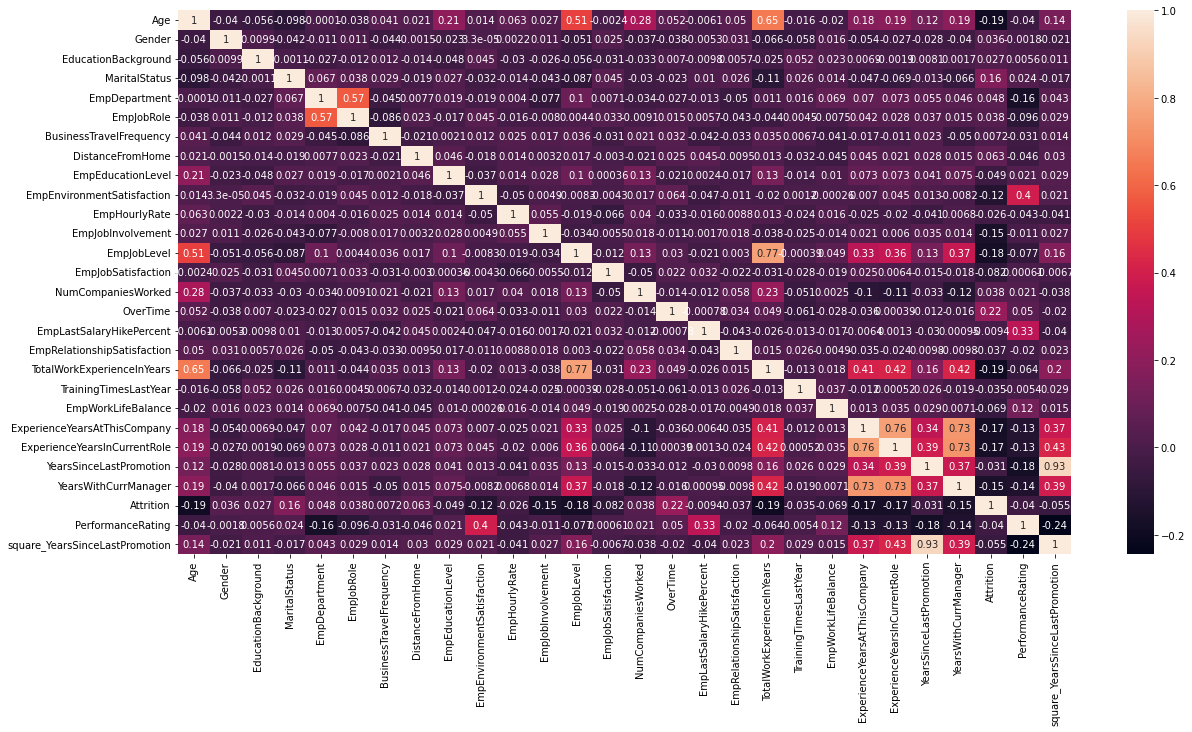

In [57]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)

#### annot=True adds numerical annotations to each cell in the heatmap, displaying the correlation coefficients between pairs of variables.
#### The result is a heatmap that visually represents the correlation between pairs of numerical variables in the dataset. This visualization helps identify patterns and relationships between variables and is a common technique for exploratory data analysis.

In [58]:
data.head()

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0 -0.541458       1                    2              2              5   
1  1.109888       1                    2              2              5   
2  0.339260       1                    1              1              5   
3  0.449349       1                    0              0              3   
4  2.541054       1                    2              2              5   

   EmpJobRole  BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0          13                        2          0.102061                  3   
1          13                        2          0.591464                  4   
2          13                        1         -0.509693                  4   
3           8                        2          0.102061                  4   
4          13                        2          0.836165                  4   

   EmpEnvironmentSatisfaction  ...  TotalWorkExperienceInYears  \
0                           4  ...                   -0.148321   
1                           4  ...                    1.202479   
2                           4  ...                    1.202479   
3                           2  ...                    1.607719   
4                           1  ...                   -0.148321   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0              -0.622235                   2                      0.868276   
1              -0.622235                   3                      0.200371   
2              -0.622235                   3                      2.649355   
3              -0.622235                   2                     -0.244898   
4              -1.414051                   3                     -0.912803   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                      0.834290                        0   
1                      0.834290                        1   
2                      2.602323                        1   
3                      0.539618                        1   
4                     -0.639070                        2   

   YearsWithCurrManager  Attrition  PerformanceRating  \
0              1.199546          0                  3   
1              0.900149          0                  3   
2              2.397136          0                  4   
3              0.600752          0                  3   
4             -0.596837          0                  3   

   square_YearsSinceLastPromotion  
0                       -1.057559  
1                        0.151501  
2                        0.151501  
3                        0.151501  
4                        0.652311  

[5 rows x 28 columns]

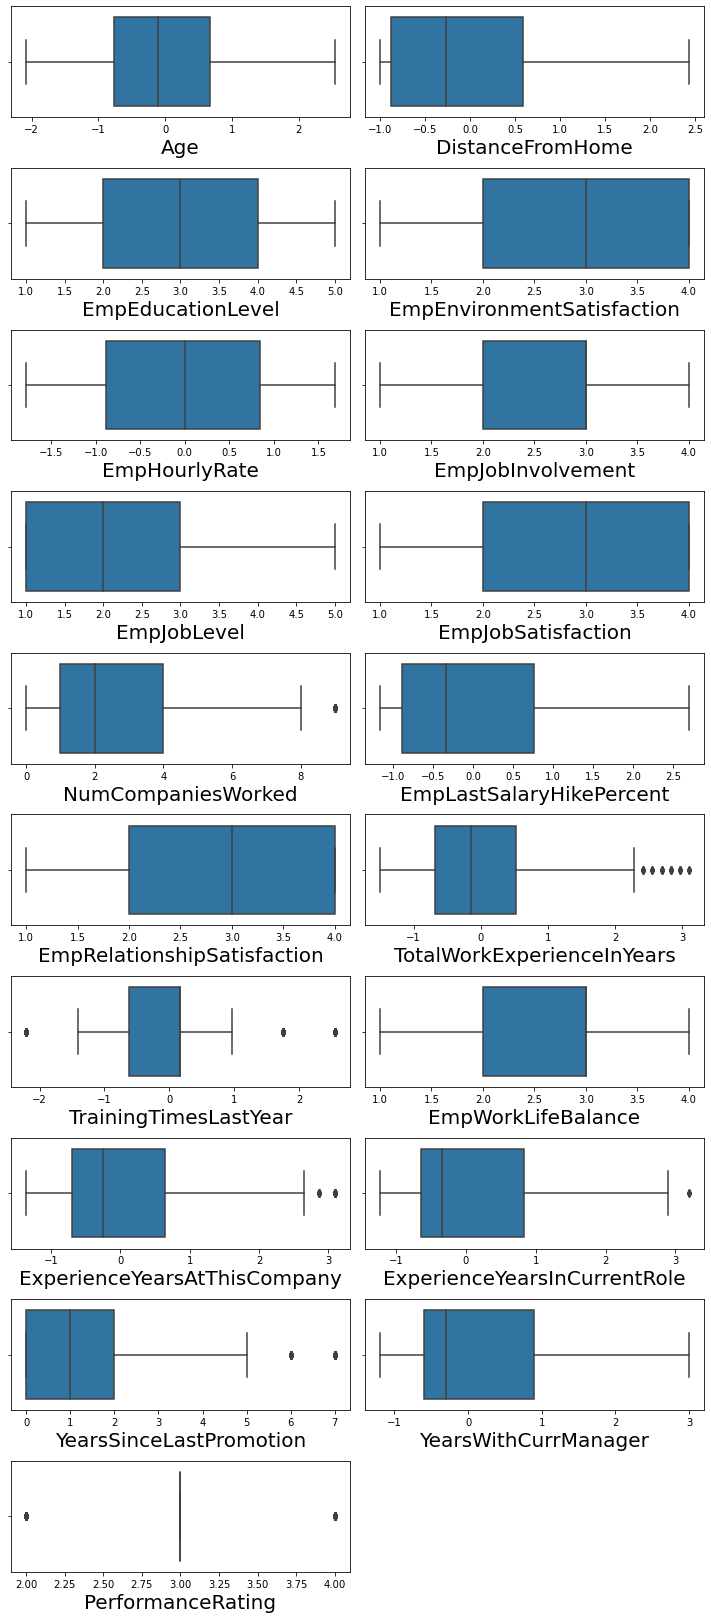

In [59]:
#rechecking outliers
plt.figure(figsize=(10,40))
plotnumber=1
for column in numerical_feature:
    if plotnumber<=28:
        ax=plt.subplot(18,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

#### The result is a set of box plots, each displaying the distribution and statistical information for a specific numerical feature in the dataset. These plots provide insights into the spread of the data, the presence of outliers, and the central tendency of each numerical feature.

In [60]:
# checking duplicate value
data.duplicated().sum()

0

#### .duplicated() is a Pandas method that returns a Boolean Series where each row is marked as True if it is a duplicate of a previous row and False if it is not.

#### .sum() is then applied to the Boolean Series. Since True is treated as 1 and False as 0 when using sum(), this effectively counts the number of True values in the Series.

#### The result is the count of duplicate rows in the dataset. This count represents how many rows in the dataset are identical to one or more previous rows. It can be useful for identifying and handling duplicate data in the dataset.

In [61]:
#droping unique feature and YearsSinceLastPromotion beacuse we have transformed this feature
data.drop(['YearsSinceLastPromotion'],axis=1,inplace=True)

#### axis=1 specifies that you want to remove a column (as opposed to a row). The axis=1 indicates that you're working along columns.

#### inplace=True is used to apply the operation directly to the DataFrame data without the need to create a new DataFrame. When inplace=True, the 'YearsSinceLastPromotion' column is dropped from the original DataFrame, and the DataFrame is modified in place.

#### So, after executing this code, the 'YearsSinceLastPromotion' column is removed from the data DataFrame, and the DataFrame is updated to exclude this column.

In [62]:
data.head()

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0 -0.541458       1                    2              2              5   
1  1.109888       1                    2              2              5   
2  0.339260       1                    1              1              5   
3  0.449349       1                    0              0              3   
4  2.541054       1                    2              2              5   

   EmpJobRole  BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0          13                        2          0.102061                  3   
1          13                        2          0.591464                  4   
2          13                        1         -0.509693                  4   
3           8                        2          0.102061                  4   
4          13                        2          0.836165                  4   

   EmpEnvironmentSatisfaction  ...  EmpRelationshipSatisfaction  \
0                           4  ...                            4   
1                           4  ...                            4   
2                           4  ...                            3   
3                           2  ...                            2   
4                           1  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                   -0.148321              -0.622235                   2   
1                    1.202479              -0.622235                   3   
2                    1.202479              -0.622235                   3   
3                    1.607719              -0.622235                   2   
4                   -0.148321              -1.414051                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                      0.868276                      0.834290   
1                      0.200371                      0.834290   
2                      2.649355                      2.602323   
3                     -0.244898                      0.539618   
4                     -0.912803                     -0.639070   

   YearsWithCurrManager  Attrition  PerformanceRating  \
0              1.199546          0                  3   
1              0.900149          0                  3   
2              2.397136          0                  4   
3              0.600752          0                  3   
4             -0.596837          0                  3   

   square_YearsSinceLastPromotion  
0                       -1.057559  
1                        0.151501  
2                        0.151501  
3                        0.151501  
4                        0.652311  

[5 rows x 27 columns]

In [63]:
data.shape

(1200, 27)

## Split training & testing data

In [64]:
#X=data.iloc[:,[4,5,9,16,20,21,22,23,24]] # we have selected only important features, we tried with these features, but getting low accuracy, hence selected all the features 
#y=data.PerformanceRating 

In [65]:
X=data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,26]]
X
y=data.PerformanceRating

#### .iloc is a Pandas method used for integer-location based indexing. It allows you to select rows and columns by their integer positions.It specifies that we want to select all rows (:) and specific columns based on their integer positions. The list  contains the integer positions of the columns we want to include in the feature matrix (X).So, X contains the selected columns from the dataset, which will be used as features for a machine learning model.y is assigned the 'PerformanceRating' column from the dataset. This column contains the target labels or the values that you want to predict using the features in X.
#### The result is that you have created two variables:- 'X', which contains the feature matrix with selected columns from the dataset and 'y', which contains the target labels to be predicted by a machine learning model.

In [66]:
data.PerformanceRating.value_counts()

3    874
2    194
4    132
Name: PerformanceRating, dtype: int64

#### The result is a count of how many times each unique performance rating value appears in the 'PerformanceRating' column of the dataset. This can be useful for understanding the distribution of performance ratings in the dataset and how many employees fall into each rating category.

#### SMOTE: SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them. SMOTE synthesises new minority instances between existing minority instances.

In [67]:
from collections import Counter
from imblearn.over_sampling import SMOTE #SMOTE(synthetic minority oversampling techinque)
sm = SMOTE() # obeject creation
print("unbalanced data   :  ",Counter(y))
X_sm,y_sm = sm.fit_resample(X,y)
print("balanced data:    :",Counter(y_sm))

unbalanced data   :   Counter({3: 874, 2: 194, 4: 132})
balanced data:    : Counter({3: 874, 4: 874, 2: 874})


#### This line imports the Counter class from the collections module. Counter is used to count occurrences of elements in a list or array. It also imports the SMOTE (Synthetic Minority Over-sampling Technique) class from the imbalanced-learn (imblearn) library. SMOTE is a technique used for oversampling the minority class in imbalanced datasets.This line creates an instance of the SMOTE class called sm. This instance will be used to apply the SMOTE oversampling technique to the dataset.This line prints the count of unique values in the original target labels y. It helps to show the class imbalance in the dataset by displaying the count of each class (e.g., each performance rating).This line applies SMOTE oversampling to the feature matrix X and target labels y. It generates synthetic samples for the minority class (less frequent class) to balance the class distribution.
#### X_sm and y_sm now contain the oversampled feature matrix and target labels, respectively.
#### print("balanced data:  ", Counter(y_sm))- This line prints the count of unique values in the y_sm target labels after SMOTE oversampling. It helps to show that the class distribution has been balanced by generating synthetic samples for the minority class.
#### The result is that the code balances the class distribution in the target labels by oversampling the minority class using SMOTE, which can be beneficial for training machine learning models when dealing with imbalanced datasets.


#### Now,target feature is balance

### Splitting into train and test

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.3,random_state=10)

#### This function is used to split a dataset into training and testing sets.
#### X_sm is the oversampled feature matrix, which contains the independent variables used for training and testing the machine learning model.

#### y_sm is the oversampled target labels, which contain the dependent variable (performance ratings) that we want to predict.

#### test_size=0.3 specifies that 30% of the data should be used for testing, and the remaining 70% will be used for training. This is a common split ratio, but you can adjust it as needed.

#### random_state=10 sets a random seed for reproducibility. By setting a random seed, you ensure that the same split is generated every time you run the code, making your results reproducible.
#### After running this code, you will have the following variables:-
#### X_train: The feature matrix for training the machine learning model.; y_train: The target labels corresponding to the training data.;X_test: The feature matrix for testing the machine learning model.;y_test: The target labels corresponding to the testing data.

## Model Creation,prediction & Evaluation

## Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score
lg=LogisticRegression(multi_class='ovr')
lg.fit(X_train,y_train)

LogisticRegression(multi_class='ovr')

#### Logistic Regression is a classification algorithm used for predicting categorical outcomes.This line creates an instance of the LogisticRegression classifier with the multi_class parameter set to 'ovr' (One-vs-Rest). It means that the classifier will use a one-vs-rest strategy for multi-class classification, where it builds a separate binary classifier for each class.
#### lg.fit(X_train, y_train)-This line trains the Logistic Regression classifier (lg) on the training data. X_train contains the feature matrix for training, and y_train contains the corresponding target labels.
#### After running this code, the Logistic Regression model is trained and ready for classification. We can use it to make predictions on new data and evaluate its performance using the imported metrics like accuracy, precision, recall, and F1-score.

In [70]:
y_pre=lg.predict(X_train)
y_p=lg.predict(X_test)

#### y_pre = lg.predict(X_train)-This line uses the trained Logistic Regression classifier (lg) to make predictions (y_pre) on the training data (X_train). It predicts the performance ratings for the instances in the training dataset.
#### y_p = lg.predict(X_test)-This line uses the same trained Logistic Regression classifier (lg) to make predictions (y_p) on the testing data (X_test). It predicts the performance ratings for the instances in the testing dataset.
#### After running this code, you will have two sets of predictions:y_pre: Predictions made on the training data. and y_p: Predictions made on the testing data.
#### These predictions can be used to evaluate the performance of the classifier and assess how well it generalizes to both the data it was trained on (training data) and new, unseen data (testing data). We can compare the predictions to the actual target labels to calculate various performance metrics like accuracy, precision, recall, and F1-score to assess the model's quality.


In [71]:
cr=classification_report(y_test,y_p)
print(cr)

              precision    recall  f1-score   support

           2       0.88      0.89      0.89       255
           3       0.87      0.76      0.81       267
           4       0.84      0.93      0.88       265

    accuracy                           0.86       787
   macro avg       0.86      0.86      0.86       787
weighted avg       0.86      0.86      0.86       787



#### This line calculates a classification report using scikit-learn's classification_report function. The classification report is generated by comparing the predicted labels (y_p) to the actual target labels (y_test) from the testing data. It computes various classification metrics such as precision, recall, F1-score, and support for each class.It's a useful tool for assessing how well the model performs on different classes and understanding its strengths and weaknesses in making predictions.

In [72]:
c=classification_report(y_train,y_pre)
print(c)

              precision    recall  f1-score   support

           2       0.87      0.90      0.89       619
           3       0.85      0.78      0.82       607
           4       0.86      0.89      0.88       609

    accuracy                           0.86      1835
   macro avg       0.86      0.86      0.86      1835
weighted avg       0.86      0.86      0.86      1835



#### This line calculates a classification report using scikit-learn's classification_report function. The classification report is generated by comparing the predicted labels (y_pre) to the actual target labels (y_train) from the training data. It computes various classification metrics such as precision, recall, F1-score, and support for each class.

In [73]:
# testing score
f1score=f1_score(y_test,y_p,average='weighted')
f1score

0.8586055928630166

#### It computes the weighted F1-score. The F1-score is a metric that combines both precision and recall to assess the model's accuracy in making predictions. The 'weighted' average specifies that the F1-scores for each class will be weighted by the number of true instances for each class

In [74]:
#training score
f1score=f1_score(y_train,y_pre,average='weighted')
f1score

0.8596088365253866

#### The weighted F1-score provides a single value that summarizes the model's overall performance on the training data. It takes into account both the precision and recall for each class while giving more weight to classes with more instances, making it a useful metric for evaluating multi-class classification models on the training set.

In [75]:
pd.crosstab(y_test,y_p)

col_0                2    3    4
PerformanceRating               
2                  228   17   10
3                   27  202   38
4                    5   13  247

#### y_test represents the actual target labels from the testing data. These are the true labels that you want to compare to the predicted labels.

#### y_p represents the predicted labels generated by the Logistic Regression model on the testing data. These are the labels predicted by the model.
#### The result is a cross-tabulation table that shows how many instances fall into each combination of true and predicted labels. This table helps you assess the performance of the model by visualizing how well it has classified the data into different classes. It can be useful for understanding the model's accuracy and where it might be making errors in predictions.

## Support vector Machine

In [76]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel="poly") ## base model with default parameters (default kernel: rbf)
svclassifier.fit(X_train, y_train)

SVC(kernel='poly')

#### This line creates an instance of the SVC classifier called svclassifier. It uses a polynomial kernel for classification. The "poly" argument specifies that a polynomial kernel should be used. The polynomial kernel is a type of kernel function that can be used with SVMs for non-linear classification.This line trains the SVC classifier (svclassifier) on the training data. X_train contains the feature matrix for training, and y_train contains the corresponding target labels. The model learns to classify data points using a polynomial kernel and the patterns in the training data.
#### After running this code, the svclassifier model will be trained and ready for classification. We can use it to make predictions on new data and evaluate its performance, just like with the Logistic Regression model mentioned earlier.

In [77]:
# Predict output for X_test & X_train
y_hat=svclassifier.predict(X_test)
y_h=svclassifier.predict(X_train)

#### This line uses the trained Support Vector Classifier (svclassifier) to make predictions (y_hat) on the testing data (X_test). It predicts the target labels for the instances in the testing dataset.
#### This line uses the same trained Support Vector Classifier (svclassifier) to make predictions (y_h) on the training data (X_train). It predicts the target labels for the instances in the training dataset.
#### These predictions can be used to evaluate the performance of the SVC classifier and assess how well it generalizes to both the data it was trained on (training data) and new, unseen data (testing data). We can compare the predictions to the actual target labels to calculate various performance metrics like accuracy, precision, recall, and F1-score to assess the model's quality.

In [78]:
## testing score
acc=accuracy_score(y_test,y_hat)
acc

0.8742058449809402

#### The accuracy score is a commonly used metric for classification tasks and represents the percentage of correctly classified instances in the testing data.It provides a measure of how accurate the model's predictions are compared to the true labels. It's a useful measure of overall classification performance, but it may not capture the complete picture, especially in imbalanced datasets or when different classes have varying importance.

In [79]:
# training score
acc=accuracy_score(y_train,y_h)
acc

0.9057220708446867

#### It calculates the accuracy score. The accuracy score measures the proportion of correctly classified instances out of all instances in the training data. It provides a measure of how accurate the model's predictions are when compared to the true labels in the training set.

In [80]:
# Classification report measures the quality of predictions. True Positives, False Positives, True negatives and False Negatives 
# are used to predict the metrics of a classification report 

print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           2       0.89      0.93      0.91       255
           3       0.92      0.73      0.81       267
           4       0.83      0.97      0.89       265

    accuracy                           0.87       787
   macro avg       0.88      0.88      0.87       787
weighted avg       0.88      0.87      0.87       787



#### This line generates a classification report using scikit-learn's classification_report function. The classification report is based on the comparison between the predicted labels (y_hat) and the actual target labels (y_test) from the testing data.

In [81]:
print(classification_report(y_train,y_h))

              precision    recall  f1-score   support

           2       0.90      0.96      0.93       619
           3       0.93      0.80      0.86       607
           4       0.89      0.95      0.92       609

    accuracy                           0.91      1835
   macro avg       0.91      0.91      0.90      1835
weighted avg       0.91      0.91      0.90      1835



#### This line generates a classification report using scikit-learn's classification_report function. The classification report is based on the comparison between the predicted labels (y_h) and the actual target labels (y_train) from the training data.

## Decision Tree

In [82]:
from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree

dt=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf= 1, min_samples_split= 3, splitter= 'random')#object creation for decision tree  
dt.fit(X_train,y_train)#training the model
y_hat=dt.predict(X_test)#prediction
y_hat#predicted values

array([2, 2, 3, 3, 3, 3, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 3, 3, 3, 2,
       3, 2, 3, 4, 2, 2, 3, 3, 3, 3, 4, 3, 2, 2, 3, 2, 4, 3, 4, 3, 2, 3,
       3, 2, 4, 2, 2, 3, 4, 4, 2, 3, 2, 4, 4, 4, 3, 3, 3, 2, 4, 2, 3, 2,
       3, 4, 2, 4, 4, 4, 4, 2, 3, 2, 3, 2, 4, 4, 2, 3, 3, 2, 3, 4, 2, 4,
       2, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 3, 2, 3, 4, 3, 3, 3, 2, 4, 3, 2,
       2, 4, 2, 2, 2, 3, 3, 2, 4, 4, 3, 2, 4, 3, 4, 3, 4, 2, 2, 4, 3, 4,
       2, 2, 3, 4, 3, 2, 3, 4, 4, 3, 2, 4, 2, 2, 4, 4, 4, 4, 3, 3, 4, 3,
       3, 4, 2, 2, 3, 4, 3, 3, 3, 2, 2, 2, 2, 4, 2, 4, 3, 2, 4, 2, 3, 4,
       3, 3, 4, 3, 4, 3, 4, 2, 2, 3, 3, 4, 4, 4, 2, 4, 3, 2, 3, 4, 2, 3,
       3, 2, 3, 4, 4, 2, 3, 4, 4, 4, 4, 3, 4, 2, 3, 3, 3, 3, 4, 2, 3, 3,
       2, 3, 4, 3, 2, 4, 3, 3, 2, 2, 4, 2, 3, 4, 3, 3, 2, 4, 4, 2, 4, 4,
       2, 4, 4, 3, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 3, 3, 4, 4, 4, 3, 3,
       2, 2, 4, 3, 3, 3, 2, 2, 3, 3, 4, 2, 3, 2, 4, 3, 4, 3, 3, 2, 4, 4,
       2, 4, 3, 3, 3, 2, 4, 4, 2, 4, 3, 4, 4, 4, 4,

#### The DecisionTreeClassifier is a classification algorithm based on decision trees.This line creates an instance of the DecisionTreeClassifier called dt with the following parameters:-

#### criterion='entropy': It specifies that the information gain criterion based on entropy is used to make decisions about splitting nodes in the tree.
#### max_depth=10: It limits the maximum depth of the decision tree to prevent overfitting.
#### min_samples_leaf=1: It sets the minimum number of samples required to be in a leaf node to 1.
#### min_samples_split=3: It sets the minimum number of samples required to split an internal node to 3.
#### splitter='random': It specifies that a random strategy should be used for splitting nodes.
#### This dt.fit(....) line trains the Decision Tree classifier (dt) on the training data. X_train contains the feature matrix for training, and y_train contains the corresponding target labels. The model learns to make predictions based on the patterns in the training data.
#### y_hat = dt.predict(X_test)  line uses the trained Decision Tree classifier (dt) to make predictions (y_hat) on the testing data (X_test). It predicts the target labels for the instances in the testing dataset.
#### y_hat displays the predicted values (y_hat) in the console, which represent the predicted target labels for the testing data.The Decision Tree classifier is trained and used to make predictions, allowing you to assess its performance on the testing data.


In [83]:
## Evalauting the model
from sklearn.metrics import accuracy_score,classification_report,f1_score    #importing mertics to check model performance
##Training score
y_train_predict=dt.predict(X_train)#passing X_train to predict Y_train
acc_train=accuracy_score(y_train,y_train_predict)#checking accuracy
acc_train

0.9754768392370572

#### This line uses the trained Decision Tree classifier (dt) to make predictions (y_train_predict) on the training data (X_train). It predicts the target labels for the instances in the training dataset.This line calculates the accuracy score by comparing the actual target labels (y_train) to the predicted labels (y_train_predict) for the training data. The accuracy score measures the proportion of correctly classified instances out of all instances in the training data.The accuracy score for the training data (acc_train) represents how well the Decision Tree classifier has learned from the training data. It measures the model's ability to correctly classify instances in the same dataset it was trained on.

In [84]:
print(classification_report(y_train,y_train_predict))# it will give precision,recall,f1 scores and accuracy  

              precision    recall  f1-score   support

           2       0.97      1.00      0.98       619
           3       0.97      0.97      0.97       607
           4       0.99      0.96      0.97       609

    accuracy                           0.98      1835
   macro avg       0.98      0.98      0.98      1835
weighted avg       0.98      0.98      0.98      1835



In [85]:
pd.crosstab(y_train,y_train_predict)#training accuracy

col_0                2    3    4
PerformanceRating               
2                  616    3    0
3                   12  591    4
4                    8   18  583

#### 'y_train' represents the actual target labels from the training data. These are the true labels that you want to compare to the predicted labels.'y_train_predict' represents the predicted labels generated by the Decision Tree classifier (dt) on the training data. These are the labels predicted by the model for the training instances.
#### The result is a cross-tabulation table that shows how many instances fall into each combination of true and predicted labels. This table helps us assess the performance of the model on the training data by visualizing how well it has classified the data into different classes. It can be useful for understanding the model's accuracy and where it might be making errors in predictions within the training set.

In [86]:
## test acc
test_acc=accuracy_score(y_test,y_hat)#testing accuracy 
test_acc

0.9148665819567979

## Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier#importing randomforest

rf_clf = RandomForestClassifier(n_estimators=100)#object creation ,taking 100 decision tree in random forest 
rf_clf.fit(X_train,y_train)#training the data  # 100 estimators means 100 base learners

RandomForestClassifier()

#### This line imports the RandomForestClassifier class from scikit-learn's ensemble module. The RandomForestClassifier is an ensemble learning method based on random forests, which consists of multiple decision trees.This line creates an instance of the RandomForestClassifier called rf_clf. It configures the classifier to use 100 decision trees (estimators) in the random forest. Each decision tree will be trained on a random subset of the training data.
#### This line trains the Random Forest classifier (rf_clf) on the training data. X_train contains the feature matrix for training, and y_train contains the corresponding target labels. The random forest model learns to make predictions by combining the predictions of multiple decision trees.
#### After running this code, the rf_clf model will be trained and ready for classification. It combines the predictions of multiple decision trees to make more accurate predictions compared to a single decision tree. We can use it to make predictions on new data and evaluate its performance, similar to the previous classifiers mentioned.

In [88]:
y_predict=rf_clf.predict(X_test)#testing
y_pre=rf_clf.predict(X_train)

#### y_predict = rf_clf.predict(X_test) uses the trained Random Forest Classifier (rf_clf) to make predictions (y_predict) on the testing data (X_test). It predicts the target labels for the instances in the testing dataset.
#### y_pre = rf_clf.predict(X_train) uses the same trained Random Forest Classifier (rf_clf) to make predictions (y_pre) on the training data (X_train). It predicts the target labels for the instances in the training dataset.

####  These predictions can be used to evaluate the performance of the Random Forest model and assess how well it generalizes to both the data it was trained on (training data) and new, unseen data (testing data). We can compare the predictions to the actual target labels to calculate various performance metrics to assess the model's quality.

In [89]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       0.97      0.96      0.96       255
           3       0.94      0.95      0.94       267
           4       0.97      0.97      0.97       265

    accuracy                           0.96       787
   macro avg       0.96      0.96      0.96       787
weighted avg       0.96      0.96      0.96       787



In [90]:
print(classification_report(y_train,y_pre))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       619
           3       1.00      1.00      1.00       607
           4       1.00      1.00      1.00       609

    accuracy                           1.00      1835
   macro avg       1.00      1.00      1.00      1835
weighted avg       1.00      1.00      1.00      1835



## Hyperparameter tuning

In [91]:
#Random Search sets up a grid of hyperparameter values and selects random combinations to train the model and score.
#This allows you to explicitly control the number of parameter combinations that are attempted.
#The number of search iterations is set based on time or resources.
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]       #Number of decision trees
max_features = ['log2', 'sqrt']                                  #maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]      #List Comprehension-using for loop in list
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.


#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)




rf_cv.fit(X_train, y_train)                                  ##training data on randomsearch cv
rf_best_params = rf_cv.best_params_                          ##it will give you best parameters 
print(f"Best paramters: {rf_best_params})")                  ##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 1800, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 80})


#### This line imports the RandomizedSearchCV class from scikit-learn's model_selection module. RandomizedSearchCV is used for hyperparameter tuning by searching through a specified parameter space.
#### The 2nd line creates a list of values for the number of estimators (decision trees) in the Random Forest. It generates values from 200 to 2000 in increments of 200.The 3rd line creates a list of options for the maximum number of features to consider when splitting a node in the decision trees.The 4th line creates a list of values for the maximum depth of the decision trees. It generates values from 10 to 110 in increments of 10.These 5th and 6th lines create lists of values for the minimum number of samples required to split an internal node (min_samples_split) and the minimum number of samples required to be in a leaf node (min_samples_leaf).
#### This dictionary random_grid defines the parameter grid to be searched during hyperparameter tuning
#### This rf_clf1 line creates an instance of the RandomForestClassifier called rf_clf1 with a specified random seed (random_state=42).
#### This rf_cv line creates an instance of RandomizedSearchCV called rf_cv for hyperparameter tuning. It specifies the following:-
#### estimator: The estimator to be tuned, which is rf_clf1.
#### scoring: The evaluation metric to optimize, which is the F1-score.
#### param_distributions: The parameter grid to be searched, defined by random_grid.
#### n_iter: The number of random parameter combinations to try during the search (100 in this case).
#### cv: The number of cross-validation folds (3 in this case).
#### verbose: The verbosity level for output during the search (2 for detailed output).
#### random_state: The random seed for reproducibility (set to 42).
#### n_jobs: The number of CPU cores to use for parallel processing during the search (set to -1 to use all available cores).
#### rf_cv.fit(X_train, y_train) -This line performs the randomized search for hyperparameter tuning on the training data (X_train and y_train) using the specified configuration.
#### rf_best_params = rf_cv.best_params_-This line extracts the best hyperparameters found during the search and stores them in the rf_best_params variable.The randomized search helps identify the best combination of hyperparameters for the Random Forest model, optimizing its performance on the training data.

In [92]:
#passing best parameter to randomforest
rf_clf2 = RandomForestClassifier(n_estimators=1800 , min_samples_split=5 , min_samples_leaf=4 , 
                                 max_features= 'sqrt' , max_depth= 80)



rf_clf2.fit(X_train, y_train)

y_predict=rf_clf2.predict(X_test)

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       0.97      0.95      0.96       255
           3       0.93      0.94      0.93       267
           4       0.95      0.96      0.95       265

    accuracy                           0.95       787
   macro avg       0.95      0.95      0.95       787
weighted avg       0.95      0.95      0.95       787



#### This line creates a new instance of the RandomForestClassifier called rf_clf2 with the following specified hyperparameters:-
#### n_estimators=1800: The number of decision trees (estimators) in the random forest.
#### min_samples_split=5: The minimum number of samples required to split an internal node.
#### min_samples_leaf=4: The minimum number of samples required to be in a leaf node.
#### max_features='sqrt': The maximum number of features to consider when splitting a node.
#### max_depth=80: The maximum depth of the decision trees.
#### rf_clf2.fit(X_train, y_train)- This line trains the Random Forest Classifier (rf_clf2) on the training data (X_train and y_train). It allows the model to learn from the training data and build an ensemble of decision trees.
#### y_predict = rf_clf2.predict(X_test)- This line uses the trained rf_clf2 model to make predictions (y_predict) on the testing data (X_test). It predicts the target labels for the instances in the testing dataset.
#### Finally, this line generates and prints a classification report to evaluate the performance of the rf_clf2 model on the testing data. The classification report provides various classification metrics such as precision, recall, F1-score, and support for each class, allowing you to assess how well the model performs on the testing data.

In [93]:

y_pred=rf_clf2.predict(X_train)

#### This line uses the trained rf_clf2 model to make predictions (y_pred) on the training data (X_train). It predicts the target labels for the instances in the training dataset.
#### The predictions (y_pred) represent the model's estimated target labels for the training data based on the patterns it learned during training. These predictions can be compared to the actual target labels (y_train) to evaluate how well the model fits or generalizes to the training data.

In [94]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           2       0.98      0.99      0.98       619
           3       0.98      0.97      0.97       607
           4       0.99      0.99      0.99       609

    accuracy                           0.98      1835
   macro avg       0.98      0.98      0.98      1835
weighted avg       0.98      0.98      0.98      1835



## Artificial Neural Network [MLP Classifier]

In [95]:
# Importing library and object creation
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(60,3),
                      learning_rate='constant',
                      max_iter=250,
                      random_state=42)

#### MLPClassifier implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation. Currently, MLPClassifier supports only the Cross-Entropy loss function, which allows probability estimates by running the predict_proba method.This code creates an instance of the MLPClassifier called model with the following specified configuration:-
#### hidden_layer_sizes=(60, 3): This parameter defines the architecture of the neural network. It specifies that there are two hidden layers in the network with 60 neurons in the first hidden layer and 3 neurons in the second hidden layer.
#### learning_rate='constant': This parameter determines the learning rate strategy for training the neural network. In this case, it is set to 'constant,' which means the learning rate remains constant throughout training.
#### max_iter=250: This parameter sets the maximum number of iterations (epochs) for training the neural network to 250.
#### random_state=42: This parameter initializes the random number generator with a specific seed (42) to ensure reproducibility of results.
#### The model is now configured and ready for training on data. We can use it to fit the model to a dataset and make predictions based on the learned neural network architecture.

In [96]:
# Fitting the training data
model.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(60, 3), max_iter=250, random_state=42)

#### X_train: The feature matrix containing the training data, which represents the input features used for training the model.
#### y_train: The target labels corresponding to the training data, which represent the correct outputs or labels that the model should learn to predict.
#### By calling model.fit(X_train, y_train), the MLP Classifier learns from the training data, adjusting its internal parameters (weights and biases) through a process known as backpropagation and gradient descent. The goal is to find a neural network configuration that minimizes the prediction error and accurately maps input features to the target labels.
#### Once the training process is complete, the model is ready to make predictions on new, unseen data using the learned neural network architecture.

In [97]:
# Predicting the probability
mlp_prdict_probability = model.predict_proba(X_test)
mlp_prdict_probability

array([[8.96534520e-01, 1.02569574e-01, 8.95905838e-04],
       [9.99997781e-01, 2.21662549e-06, 2.03061495e-09],
       [9.10305017e-01, 8.96360705e-02, 5.89126254e-05],
       ...,
       [4.27021912e-06, 9.99916025e-01, 7.97045399e-05],
       [9.42593512e-01, 5.68593711e-02, 5.47117051e-04],
       [3.57183466e-08, 5.35632677e-03, 9.94643638e-01]])

#### mlp_predict_probability: This variable stores the predicted class probabilities for the testing data. It's a NumPy array where each row corresponds to an instance in the testing data, and each column represents the predicted probability of that instance belonging to a specific class.

#### model.predict_proba(X_test): This code calls the predict_proba method of the model (MLP Classifier) with X_test as the input. The predict_proba method calculates the predicted probabilities of each class for each instance in X_test using the trained neural network. It provides a probability distribution over all the possible classes, allowing you to see how confident the model is about its predictions.

#### By examining mlp_predict_probability, we can assess the model's level of confidence in its predictions for the testing data. Each row's probabilities sum to 1, indicating the likelihood of each class for a given instance.

In [98]:
# Prediction on test data
mlp_test_predict = model.predict(X_test)

# Prediction on training data
mlp_train_predict = model.predict(X_train)

#### mlp_test_predict: This variable stores the predicted class labels for the testing data (X_test). It contains the model's predictions for each instance in the testing dataset.
#### model.predict(X_test): This code calls the predict method of the model (MLP Classifier) with X_test as the input. The predict method uses the trained neural network to make predictions on the testing data. It assigns a class label to each instance based on the highest predicted probability among the classes.
#### mlp_train_predict: This variable stores the predicted class labels for the training data (X_train). It contains the model's predictions for each instance in the training dataset.

#### model.predict(X_train): This code calls the predict method of the model (MLP Classifier) with X_train as the input. Similar to the testing data, the predict method uses the trained neural network to make predictions on the training data.

#### These predictions (mlp_test_predict and mlp_train_predict) represent the class labels assigned by the model for each instance in the testing and training datasets, respectively. They allow us to assess how well the model's predictions align with the actual target labels in both datasets.

In [99]:
mlp_train_accuracy = accuracy_score(mlp_train_predict,y_train)
print("Training accuracy of MLP model is:",mlp_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(mlp_train_predict,y_train))

Training accuracy of MLP model is: 99.67302452316076
Classification report of training:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00       619
           3       0.99      1.00      1.00       601
           4       1.00      0.99      1.00       615

    accuracy                           1.00      1835
   macro avg       1.00      1.00      1.00      1835
weighted avg       1.00      1.00      1.00      1835



In [100]:
mlp_test_accuracy = accuracy_score(mlp_test_predict,y_test)
print("Testing accuracy of MLP model is:",mlp_test_accuracy*100)
print("Classification report of testing:"'\n',classification_report(mlp_test_predict,y_test))

Testing accuracy of MLP model is: 91.4866581956798
Classification report of testing:
               precision    recall  f1-score   support

           2       0.93      0.92      0.93       259
           3       0.85      0.91      0.88       250
           4       0.96      0.91      0.94       278

    accuracy                           0.91       787
   macro avg       0.92      0.91      0.91       787
weighted avg       0.92      0.91      0.92       787



In [101]:
pd.crosstab(mlp_test_predict,y_test)

PerformanceRating    2    3    4
row_0                           
2                  238   18    3
3                   14  228    8
4                    3   21  254

#### pd.crosstab(...): This code calls the crosstab function from the Pandas library. It is used to create a cross-tabulation or contingency table, which is a way to tabulate the frequency of occurrence of different combinations of values in two or more categorical variables.

#### mlp_test_predict: This variable represents the predicted class labels made by the MLP Classifier model on the testing data. It contains the model's predictions for each instance in the testing dataset.

#### y_test: This represents the actual or true class labels from the testing data. It contains the correct class labels corresponding to each instance in the testing dataset.

#### The resulting cross-tabulation table shows how many instances were classified into each combination of predicted and actual class labels. It allows us to evaluate the model's performance by comparing its predictions to the ground truth labels. This can be helpful for assessing accuracy, precision, recall, and other classification metrics.

## Conclusion:

#### We can conclude that top 3 Important Factors affecting employee performance are-

#### 1)Employee EnvironmentSatisfaction,

#### 2)Employee Last Salary Hike Percent and

#### 3)EmpWorkLifeBalance
#### Support vector machine well perform on training data with accuracy 90% but the test score is 87%.
#### Random forest very well perform in training data with 100% accuracy but in testing 96% after doing hyperparameter tunning testing score is decreases.
#### Artifical neural network[Multilayer percepton] perform very well on training data with 99% accuracy and testing score is 91.48%.
#### So we are selecting Random forest model for our project.

## Recommendations To Improve Employee Performance

#### The overall employee performance can be achieved by employee environment satisfaction. The company needs to focus more on the employee environment satisfaction.

#### Shuffling the manager after every 2-3 years will result in good performance of employee.

#### The salary hike will give the boost to the employees to perform well.

#### Promote the employee every 6th month

#### Improve Employee's work-life balance this affects the performance rating.

#### While recruiting for HR, consider the female candidates where they perform well compared to male.

#### The development and sales department is having an overall higher performance comparing to rest of the departments. While some of the employees who gives feedback like Low & Medium from Job Satisfaction & Relationship Satisfaction feature, such employees gives Excellent performance more in number. So company should focus on them.